In [1]:
import pandas as pd
import numpy as np

from interpret.glassbox import ExplainableBoostingClassifier as ebc
from interpret.glassbox import ExplainableBoostingRegressor as ebr
from sklearn.metrics import roc_auc_score as auc
from interpret import show
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import mimic_loaders
mimic_loaders.data_dir = ""
from mimic_loaders import load_mimic2, load_mimic3, load_mimic4
mimic2_X, mimic2_Y = load_mimic2()
print(f"MIMIC2 Shape: {mimic2_X.shape}")

mimic3_X, mimic3_Y = load_mimic3()
print(f"MIMIC3 Shape: {mimic3_X.shape}")

mimic4_X, mimic4_Y, mimic4_treatments = load_mimic4()
print(f"MIMIC4 Shape: {mimic4_X.shape}")

MIMIC2 Shape: (24508, 17)
MIMIC3 Shape: (27348, 23)


/Users/blengerich/Dropbox/Professional/Research/Experiments/Treatment_Effects/DeathByRoundNumbers/experiment_utils.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], np.percentile(df[col], 0.1), np.percentile(df[col], 99.9))


MIMIC4 Shape: (76540, 34)


In [3]:
# Unify feature names.
unified_features = ['Age', 'BUN', 'Albumin', 'Bilirubin', 'Chloride', 'Creatinine',
                    'Glucose', 'HeartRate', 'Magnesium', 'Sodium', 'SBP', 'Temp',
                    'Platelet', 'Potassium', 'WBC']

mimic2_X_sel = mimic2_X[["Age", "Bilirubin", "HR", "K", "Na", "SBP", "Temperature", "Urea", "WBC"]]
mimic2_X_sel.columns = ["Age", "Bilirubin", "HeartRate", "Potassium", "Sodium", "SBP", "Temp", "BUN", "WBC"]

mimic3_X_sel = mimic3_X[["age", "albumin", "bun", "chloride", "creatinine",
                         "glucose", "heartrate_max", "magnesium", "platelet", "potassium",
                         "sodium", "sysbp_max", "tempc_max", "wbc"]]
mimic3_X_sel.columns = ["Age", "Albumin", "BUN", "Chloride", "Creatinine",
                       "Glucose", "HeartRate", "Magnesium", "Platelet", "Potassium",
                       "Sodium", "SBP", "Temp", "WBC"]

mimic4_X_sel = mimic4_X[["age", "Albumin", "BUN", "Arterial Blood Pressure systolic",
                         "Chloride (serum)", "Creatinine (serum)", "Glucose (serum)", "Magnesium", "Platelet Count",
                        "Potassium (serum)", "Sodium (serum)", "Temperature Fahrenheit", "Total Bilirubin", "WBC"]]
mimic4_X_sel.columns = ["Age", "Albumin", "BUN", "SBP",
                       "Chloride", "Creatinine", "Glucose", "Magnesium", "Platelet",
                       "Potassium", "Sodium", "Temp", "Bilirubin", "WBC"]

columns_intersection = set(mimic4_X_sel.columns).intersection(
    set(mimic3_X_sel.columns)).intersection(set(mimic2_X_sel.columns))

columns_union = set(mimic4_X_sel.columns).union(
    set(mimic3_X_sel.columns)).union(set(mimic2_X_sel.columns))

## MIMIC-II

In [4]:
from experiment_utils import run_experiment
ebms = {}
ebm_globals = {}
ebms["mimic2"], ebm_globals["mimic2"] = run_experiment(mimic2_X_sel, mimic2_Y)

XGB-1
AUC	Train:0.80
AUC	Test:0.77
APS	Train:0.40
APS	Test:0.33
F1	Train:0.21
F1	Test:0.19
XGB-2
AUC	Train:0.90
AUC	Test:0.76
APS	Train:0.69
APS	Test:0.34
F1	Train:0.48
F1	Test:0.24
XGB-3
AUC	Train:0.98
AUC	Test:0.75
APS	Train:0.91
APS	Test:0.34
F1	Train:0.75
F1	Test:0.27
MLP
AUC	Train:0.74
AUC	Test:0.72
APS	Train:0.31
APS	Test:0.28
F1	Train:0.12
F1	Test:0.12
EBM
AUC	Train:0.79
AUC	Test:0.77
APS	Train:0.37
APS	Test:0.32
F1	Train:0.15
F1	Test:0.14
Calibrated EBM
AUC	Train:0.79
AUC	Test:0.78
APS	Train:0.37
APS	Test:0.35
F1	Train:0.17
F1	Test:0.18


# Helper functions for pretty plotting and automated, systematic available from:
[https://github.com/blengerich/ebm_utils](github.com/blengerich/ebm_utils)

# Install by
```pip install git+https://github.com/blengerich/ebm_utils```

,Feature,Value
0,SBP,65.0
1,WBC,4.0


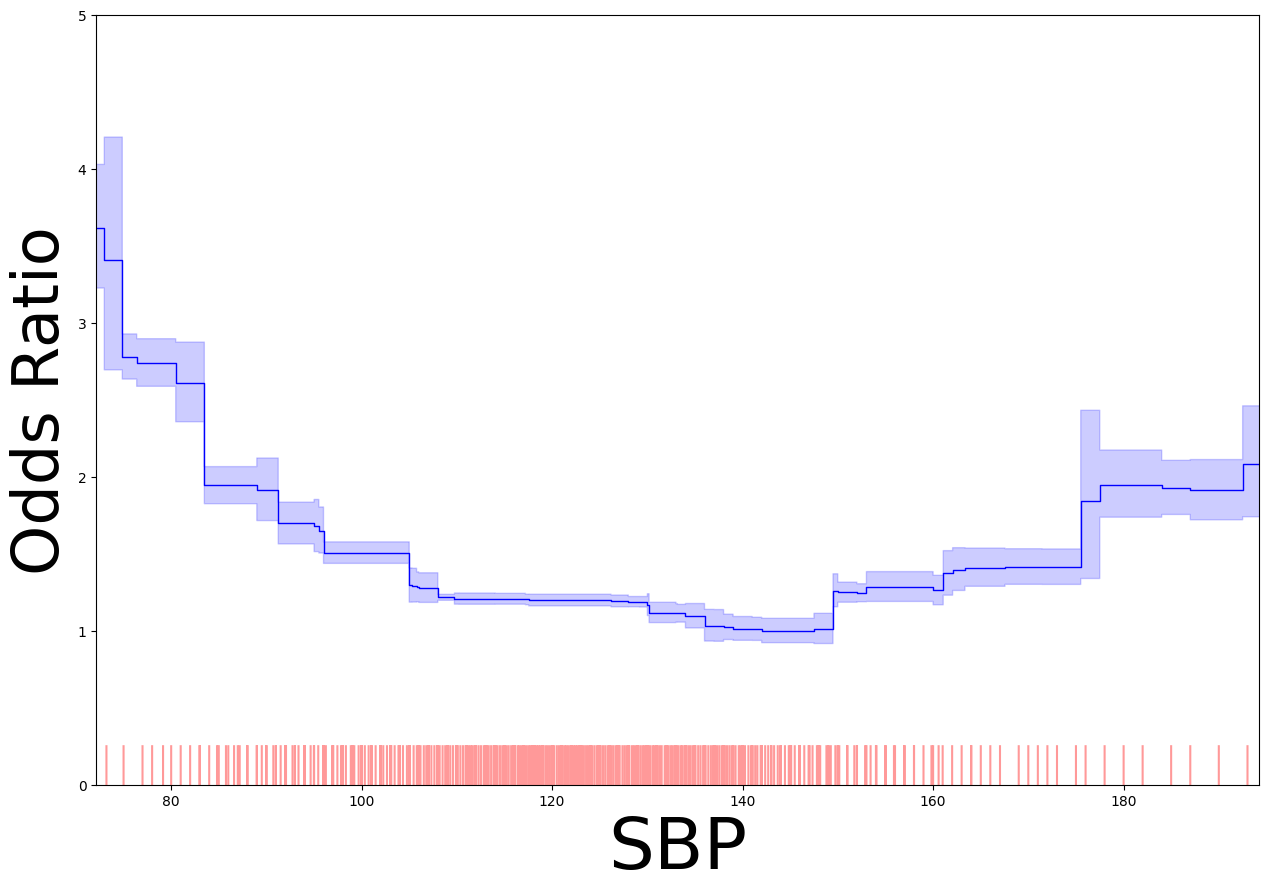

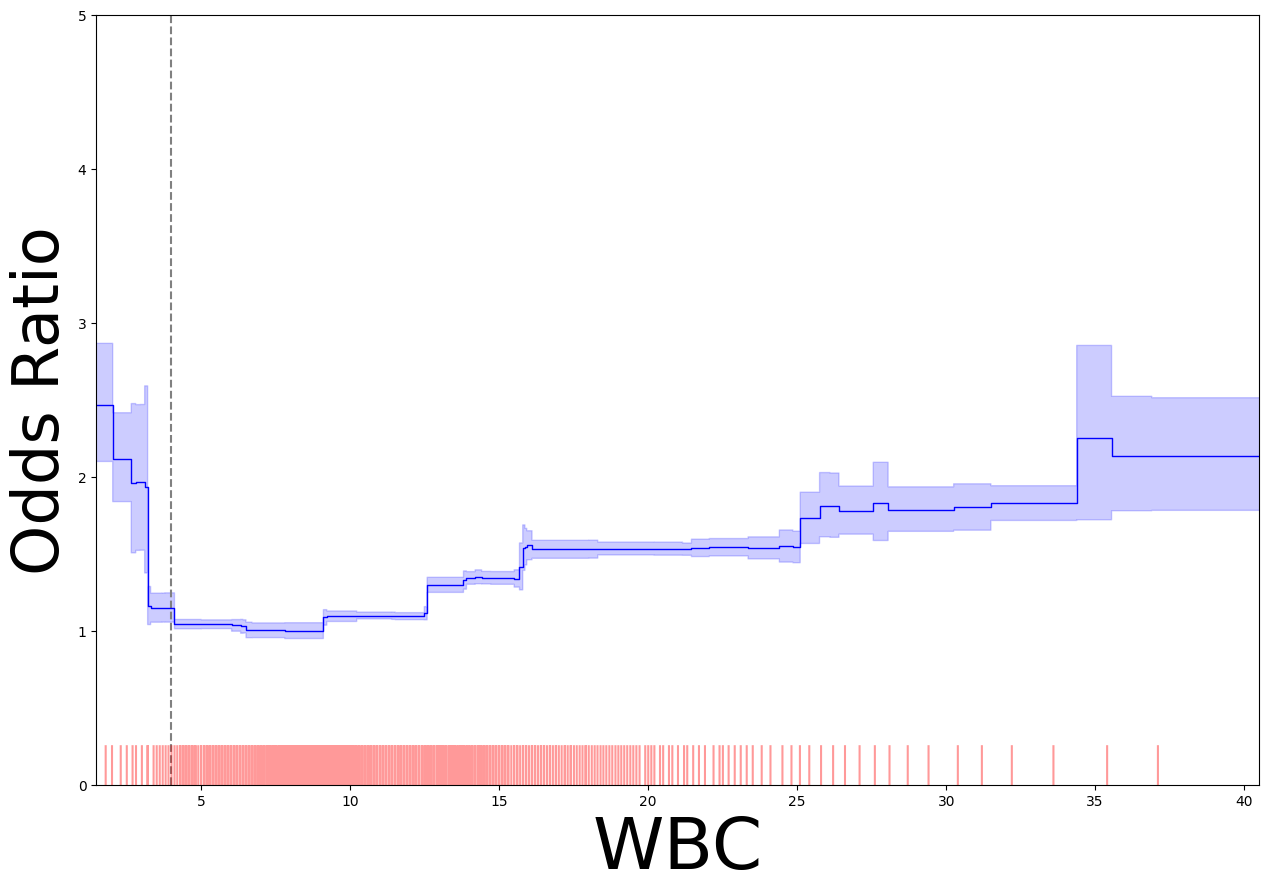

In [4]:
from ebm_utils.analysis.changepoints import find_and_plot_discontinuities, find_and_plot_non_monotonicities

find_and_plot_non_monotonicities(mimic2_X_sel, mimic2_Y.values,
                                 prob_threshold=0.1, counter_causal_only=True)

,Feature,Value,# Samples,Effect Size,P-Ratio
21,Sodium,138.203800,5440.0,1.198770,986.2505000000172
30,BUN,12.942000,4580.0,1.236810,973.410670000003
2,Age,69.185490,2803.0,1.387900,918.7998238261445
33,BUN,36.236000,2357.0,1.384196,766.306
32,BUN,31.000000,2210.0,1.335462,639.3026666666667
22,Sodium,140.560000,4148.0,1.123249,482.10400000000067
11,HeartRate,84.758000,2239.0,1.232356,467.7890599999991
10,HeartRate,78.944000,2181.0,1.185912,371.88599999999894
31,BUN,28.000000,2294.0,1.142398,305.39933333333363
23,Sodium,143.000000,2408.0,1.118190,269.0


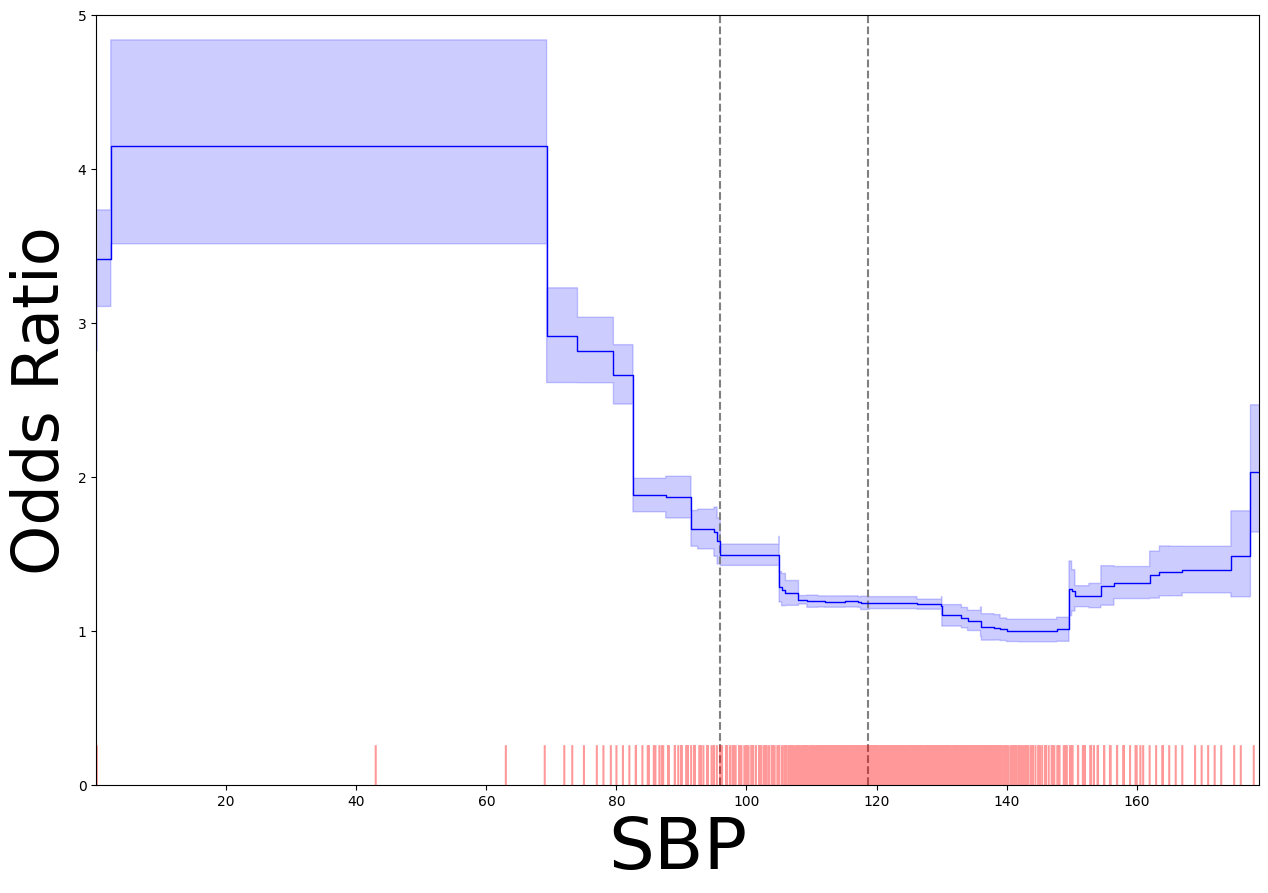

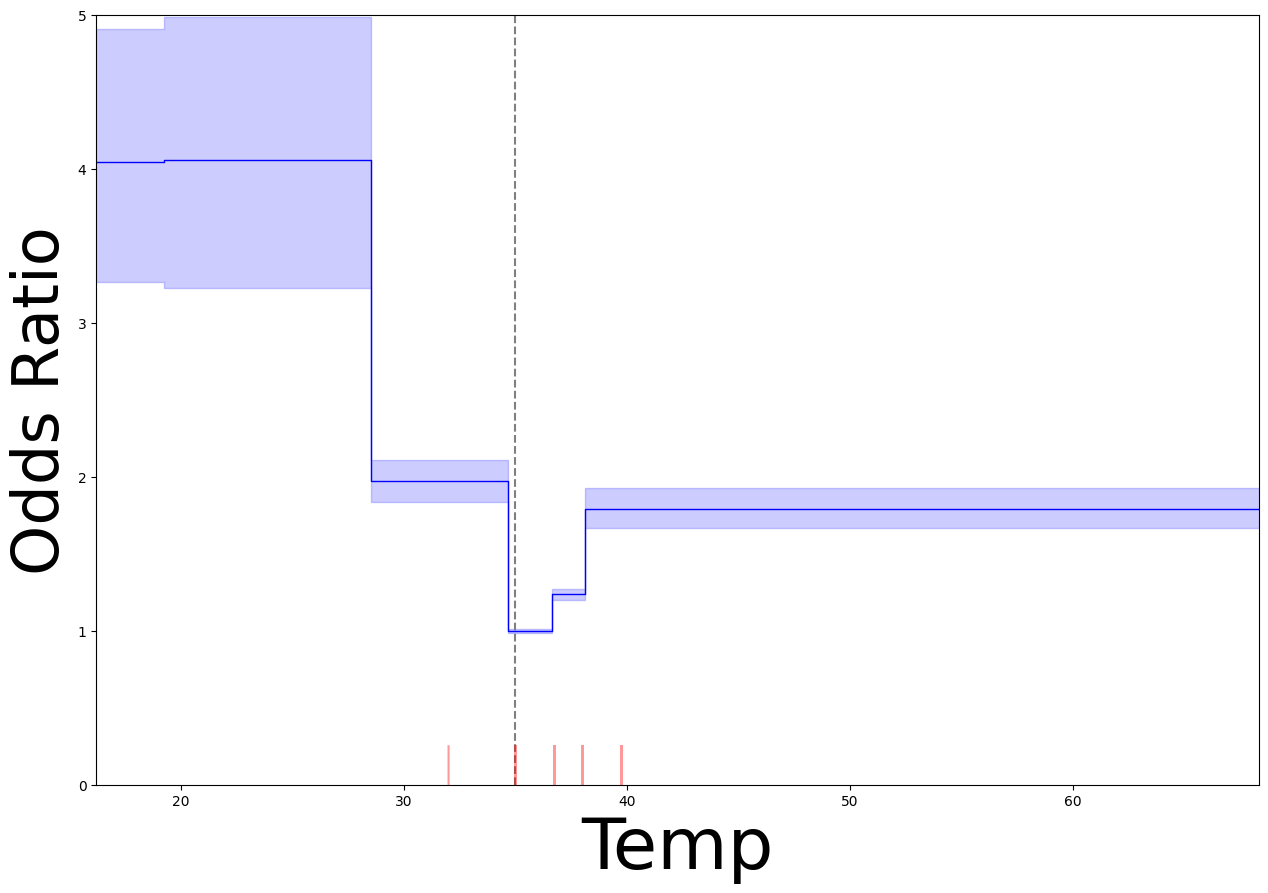

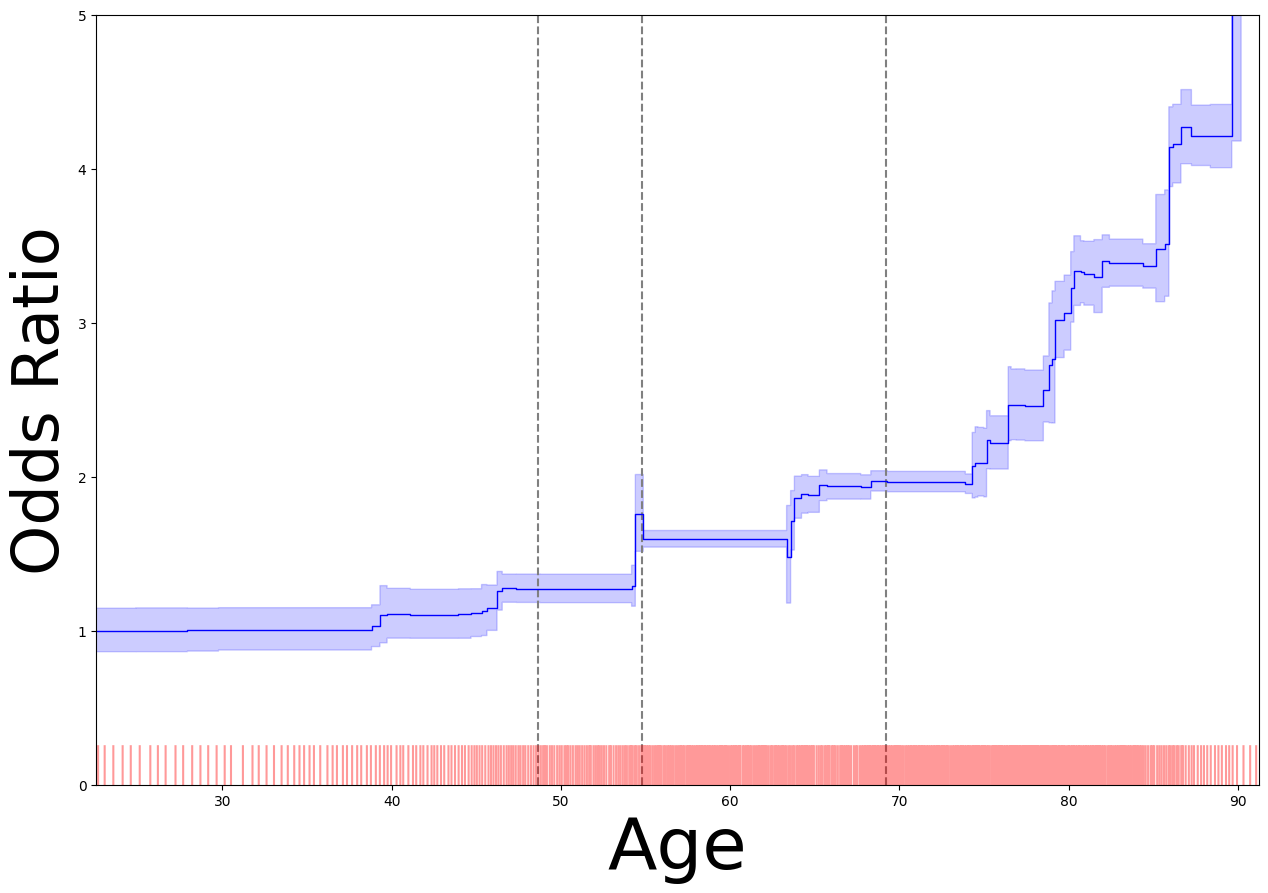

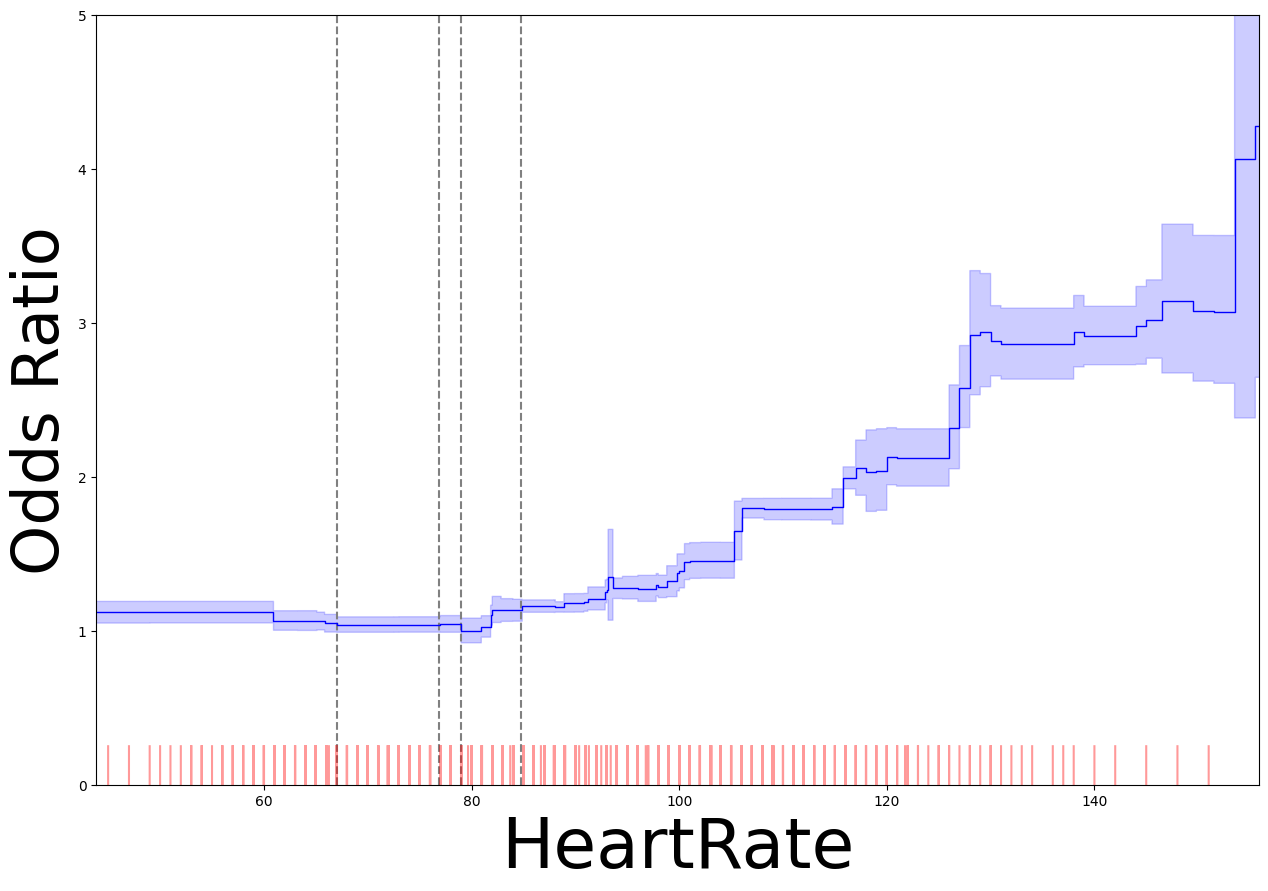

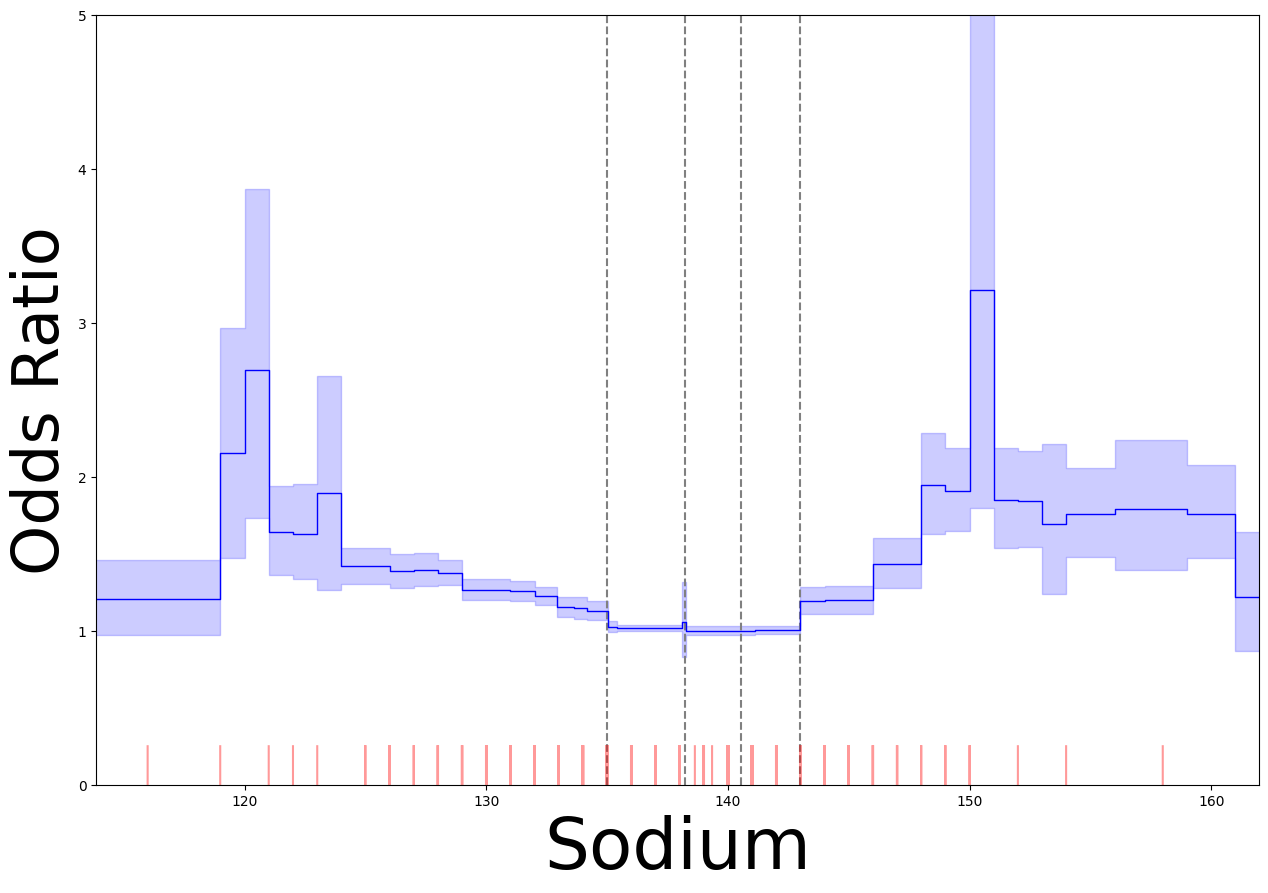

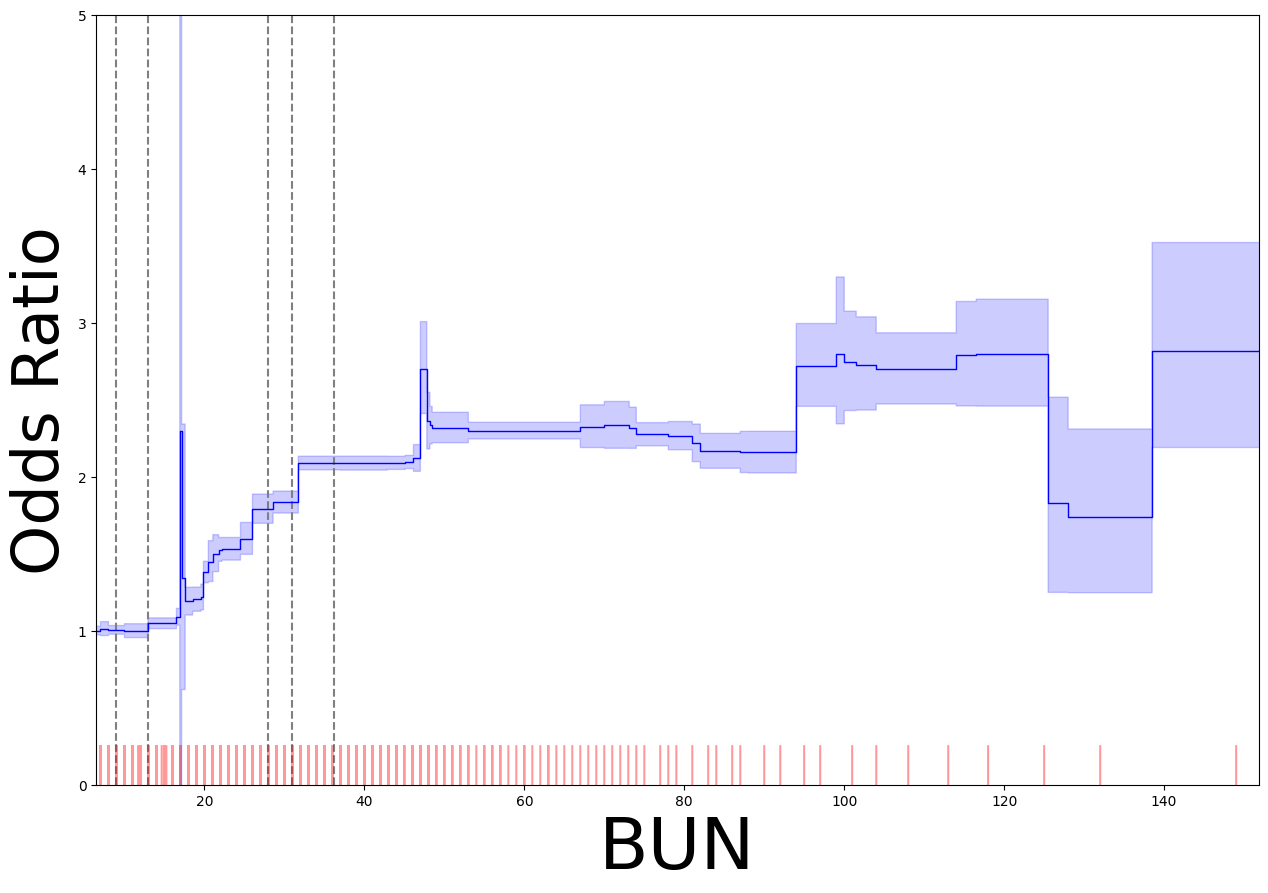

In [5]:
find_and_plot_discontinuities(
    mimic2_X_sel, mimic2_Y.values,
    min_samples=2000,
    min_effect_size=1.1)

## MIMIC-III

In [5]:
ebms["mimic3"], ebm_globals["mimic3"] = run_experiment(mimic3_X_sel, mimic3_Y)

XGB-1
AUC	Train:0.77
AUC	Test:0.74
APS	Train:0.32
APS	Test:0.26
F1	Train:0.11
F1	Test:0.08
XGB-2
AUC	Train:0.89
AUC	Test:0.74
APS	Train:0.63
APS	Test:0.25
F1	Train:0.37
F1	Test:0.17
XGB-3
AUC	Train:0.98
AUC	Test:0.70
APS	Train:0.92
APS	Test:0.23
F1	Train:0.75
F1	Test:0.17
MLP
AUC	Train:0.66
AUC	Test:0.65
APS	Train:0.21
APS	Test:0.21
F1	Train:0.02
F1	Test:0.03
EBM
AUC	Train:0.76
AUC	Test:0.74
APS	Train:0.30
APS	Test:0.26
F1	Train:0.06
F1	Test:0.07
Calibrated EBM
AUC	Train:0.76
AUC	Test:0.76
APS	Train:0.29
APS	Test:0.30
F1	Train:0.07
F1	Test:0.09


,Feature,Value
0,Glucose,72.000000
1,Glucose,324.000000
2,Temp,35.666665
3,WBC,0.900000


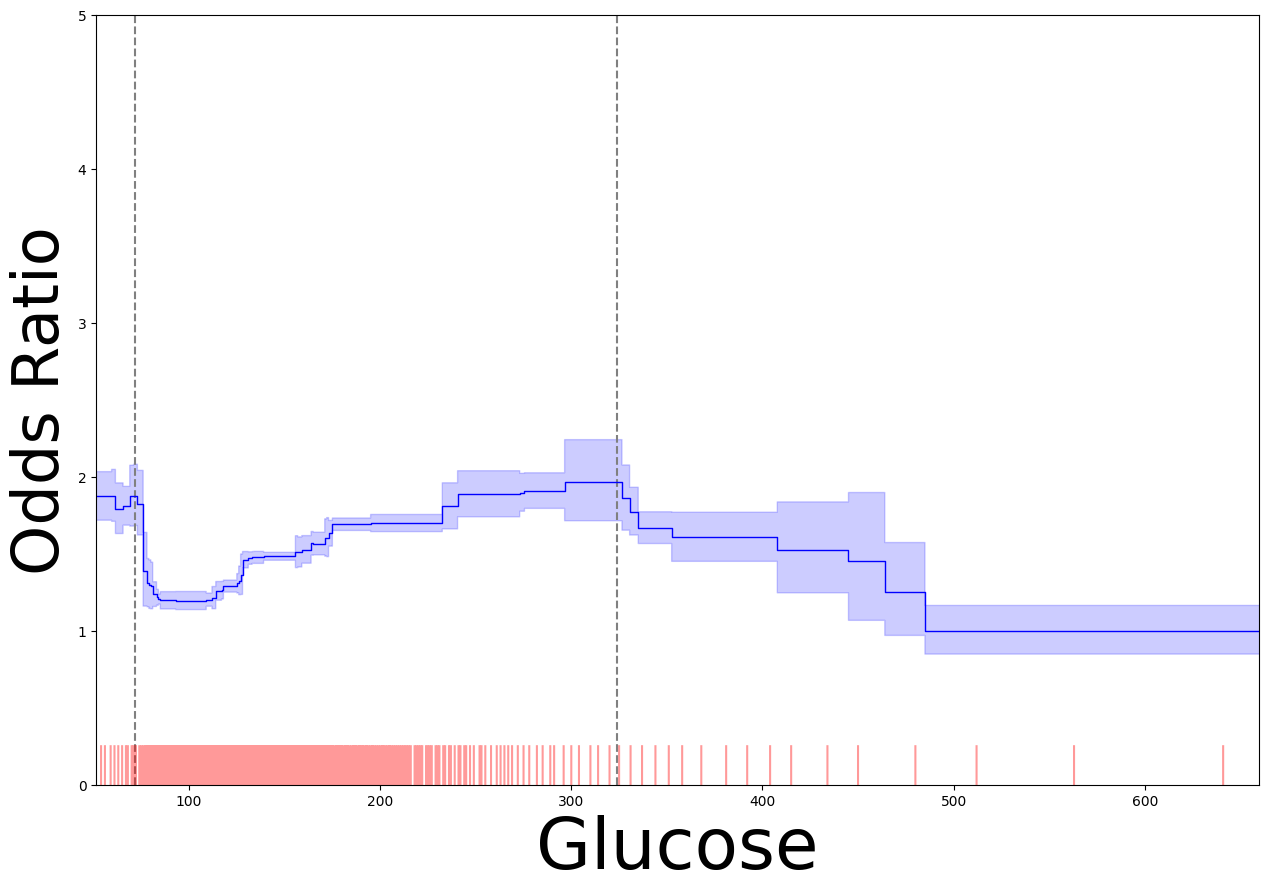

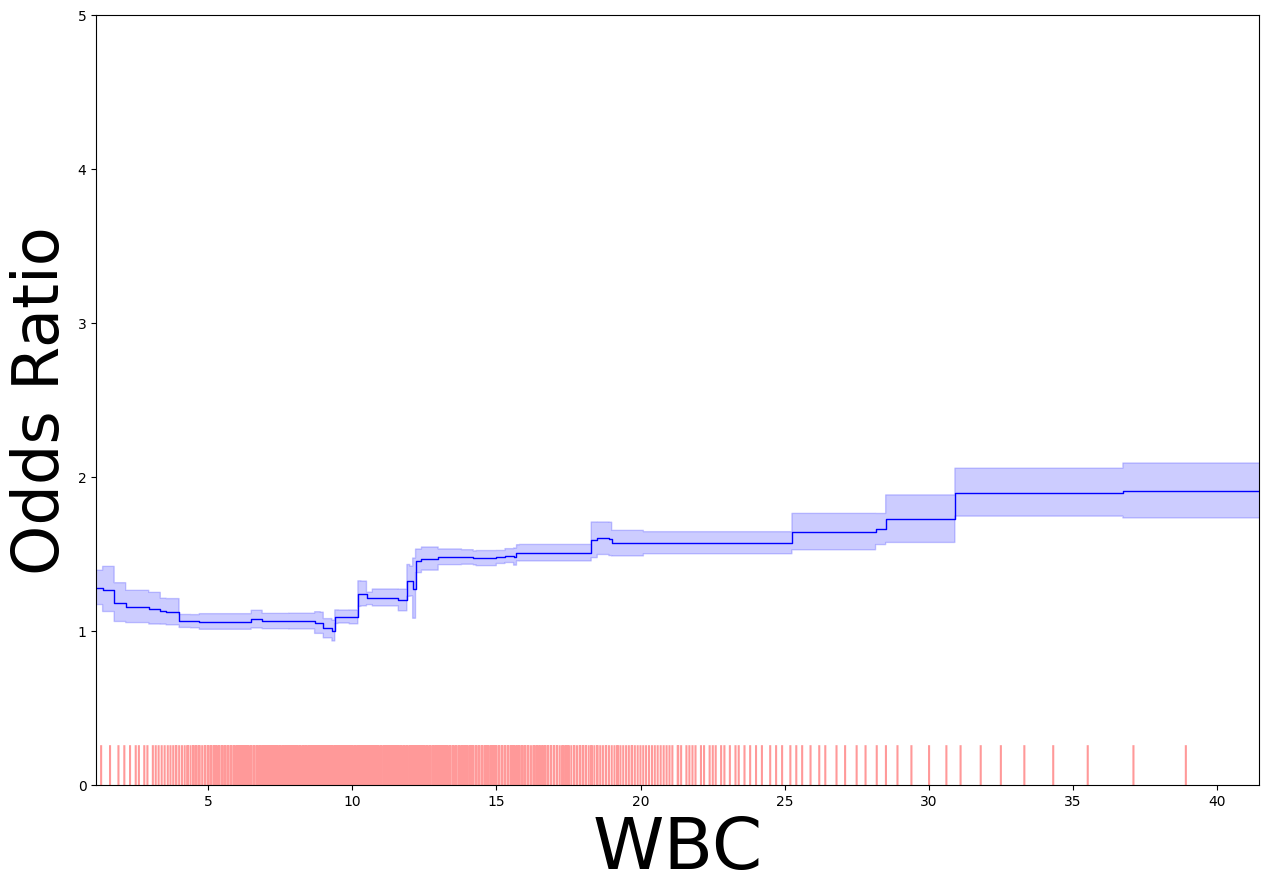

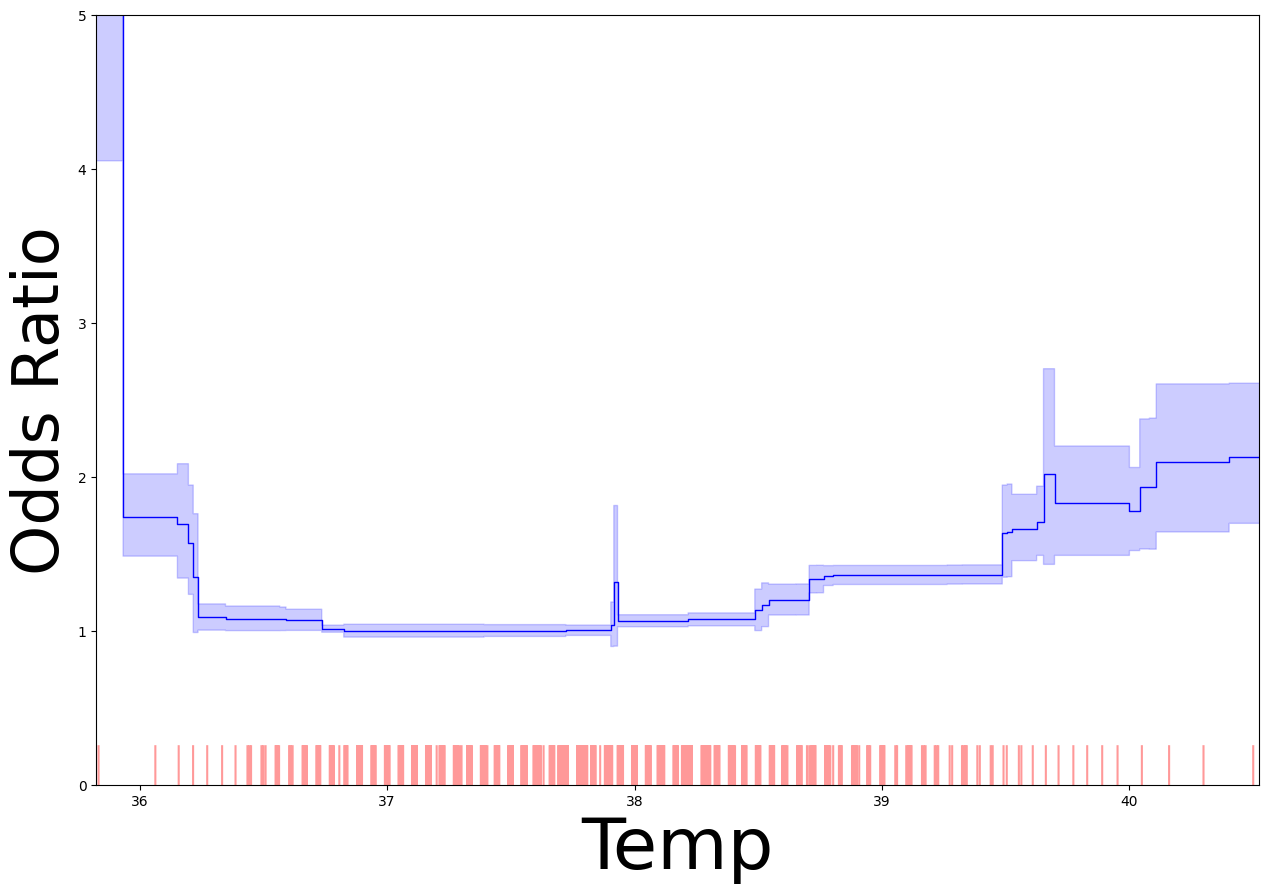

In [6]:
find_and_plot_non_monotonicities(mimic3_X_sel, mimic3_Y,
                                 prob_threshold=0.1, counter_causal_only=True)

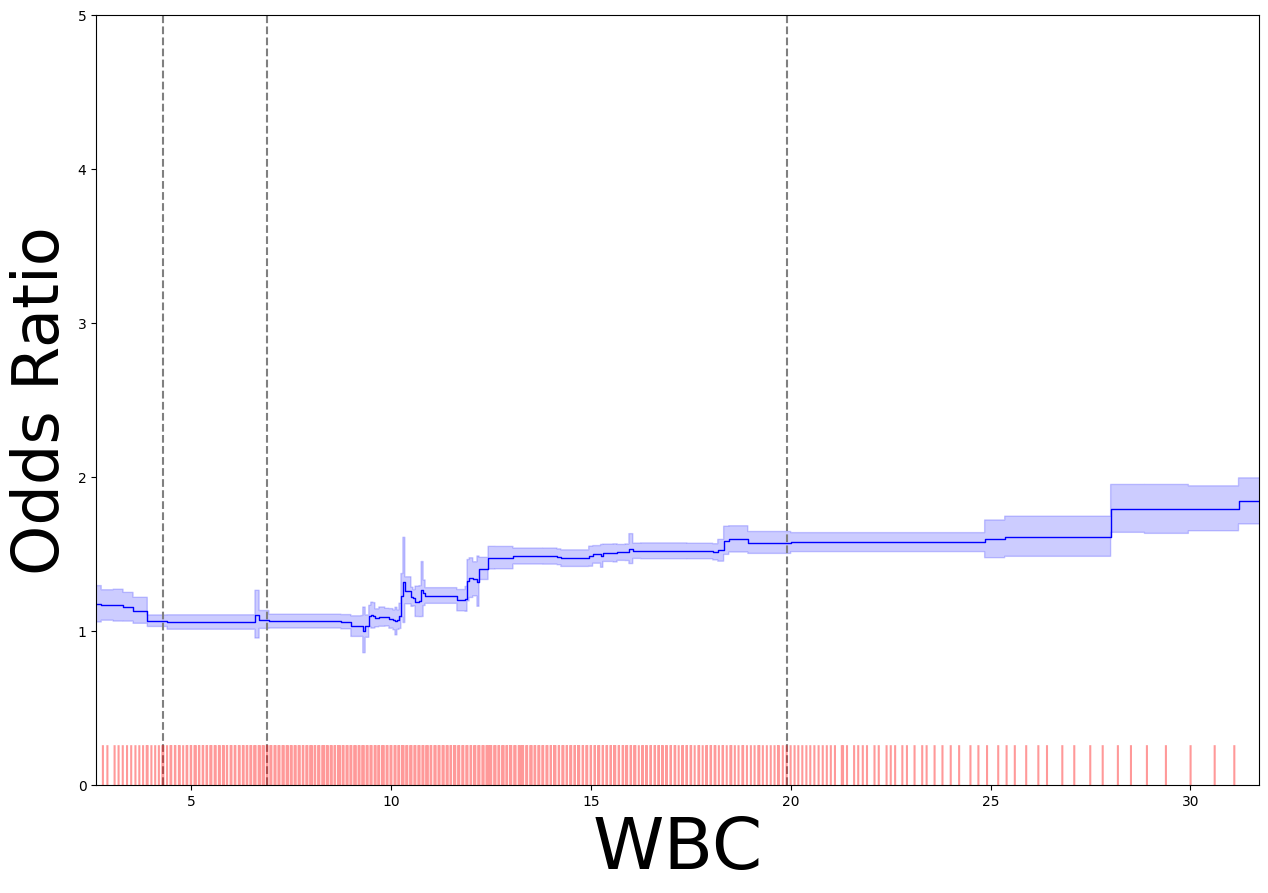

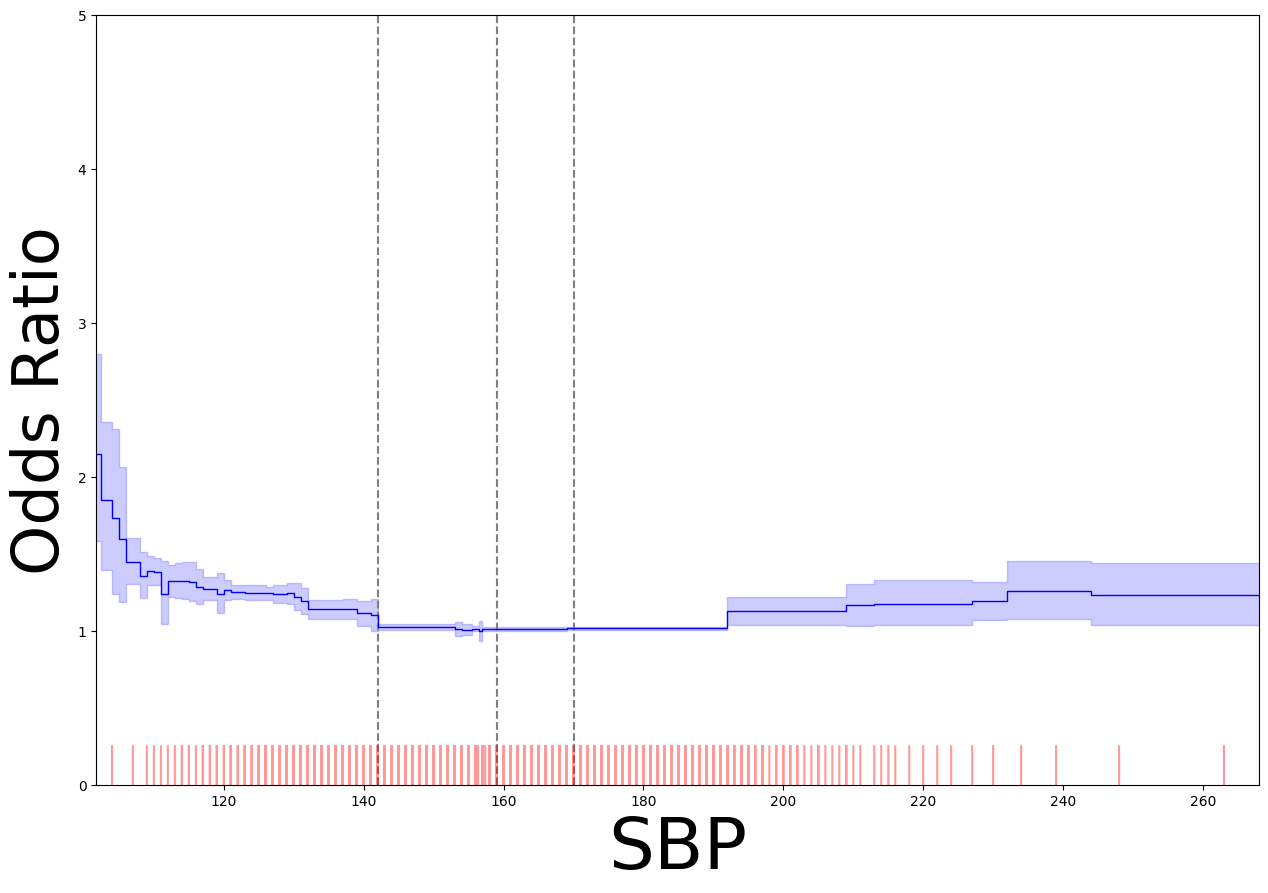

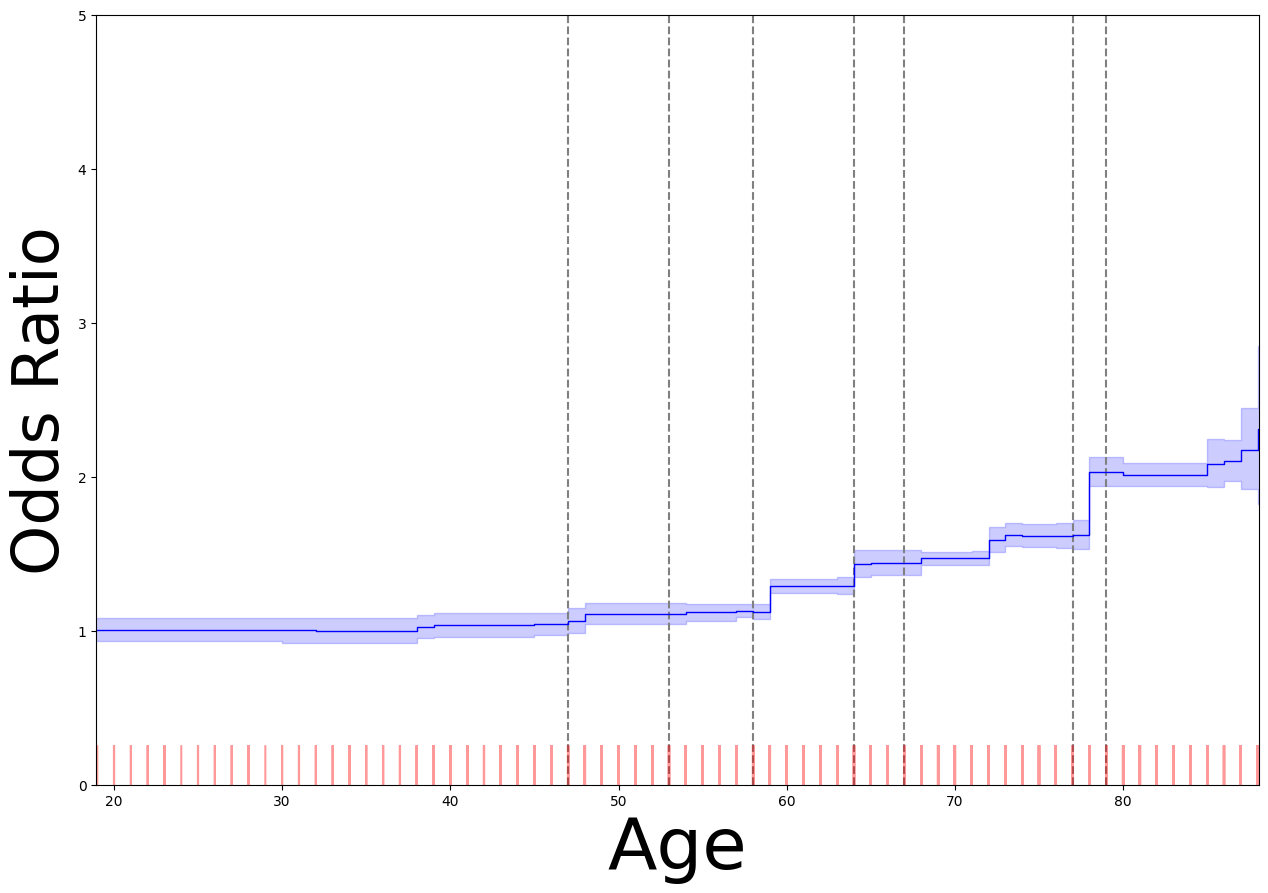

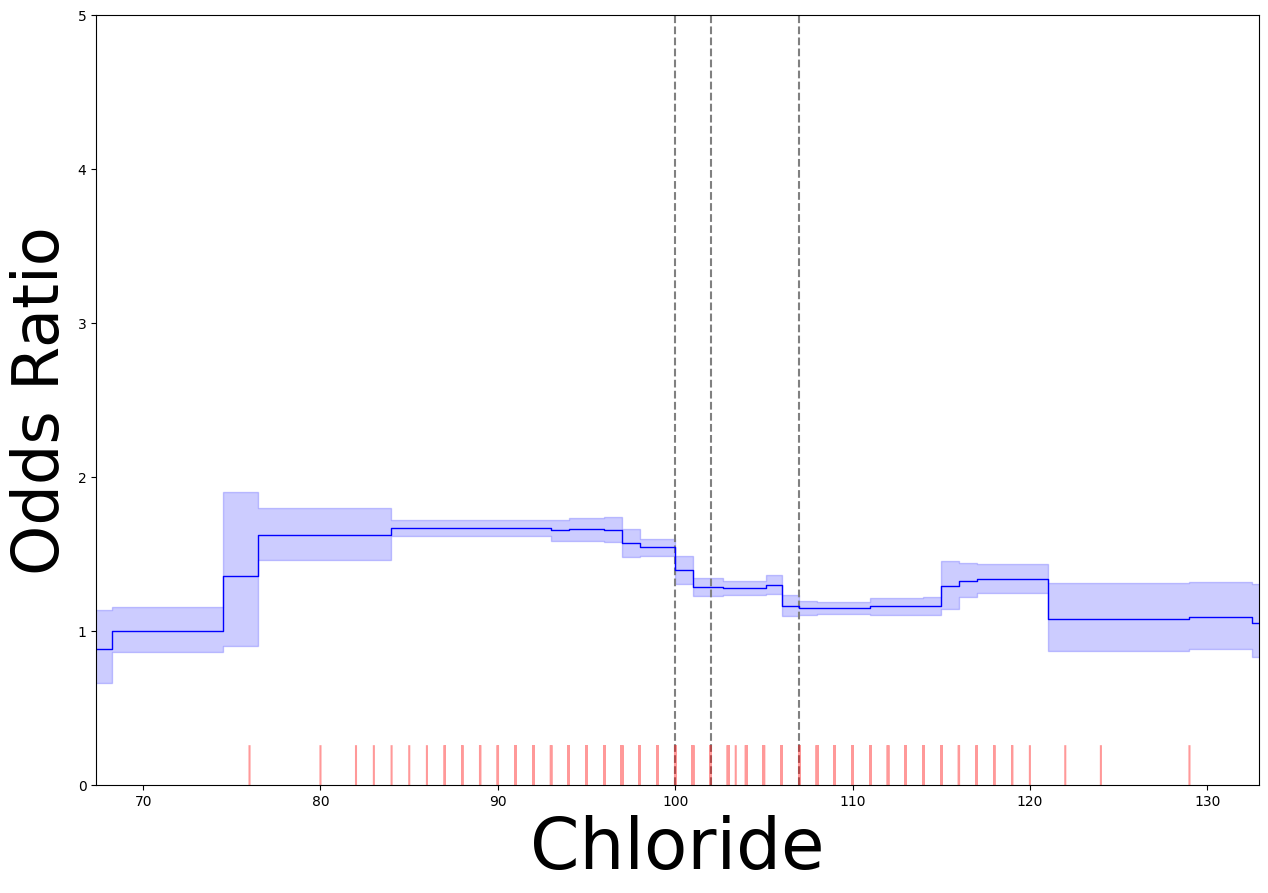

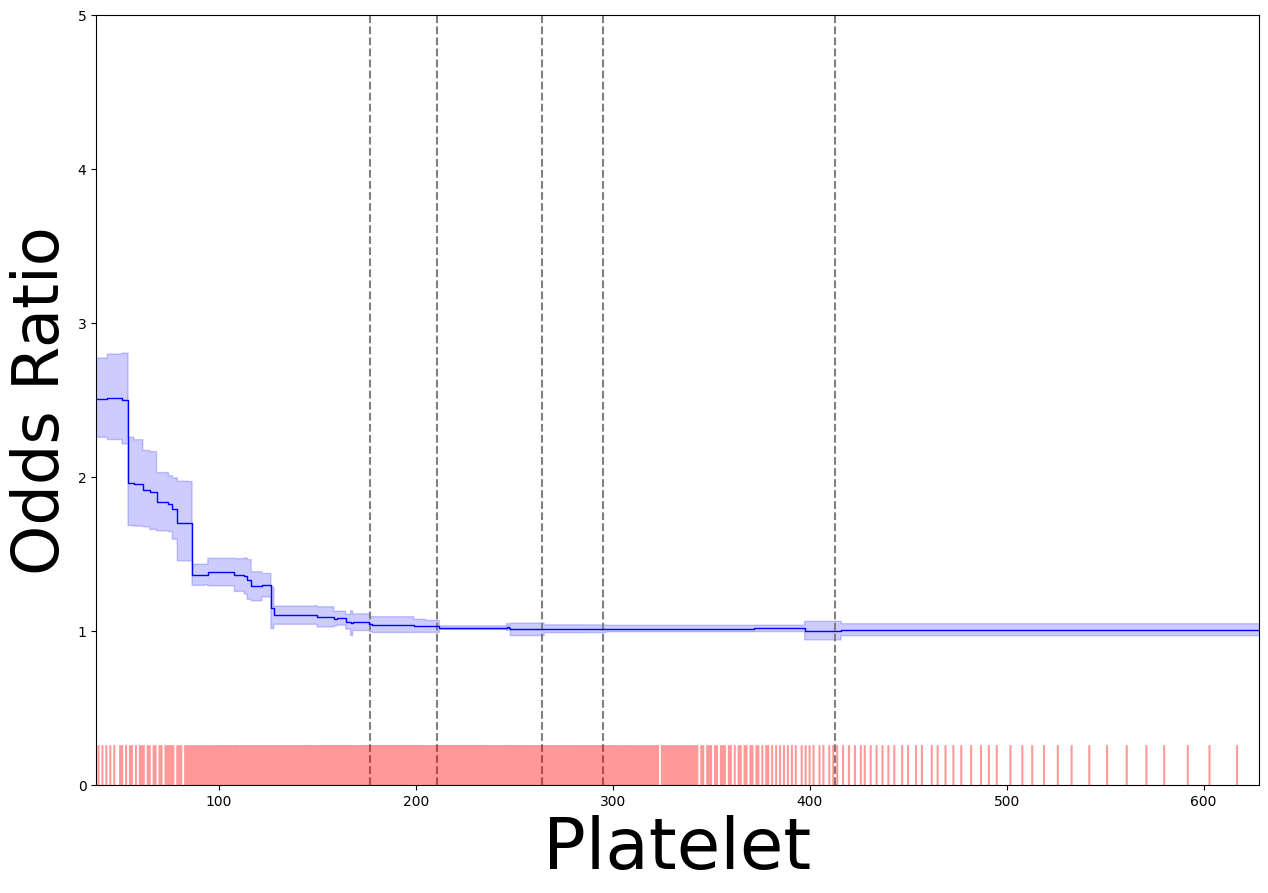

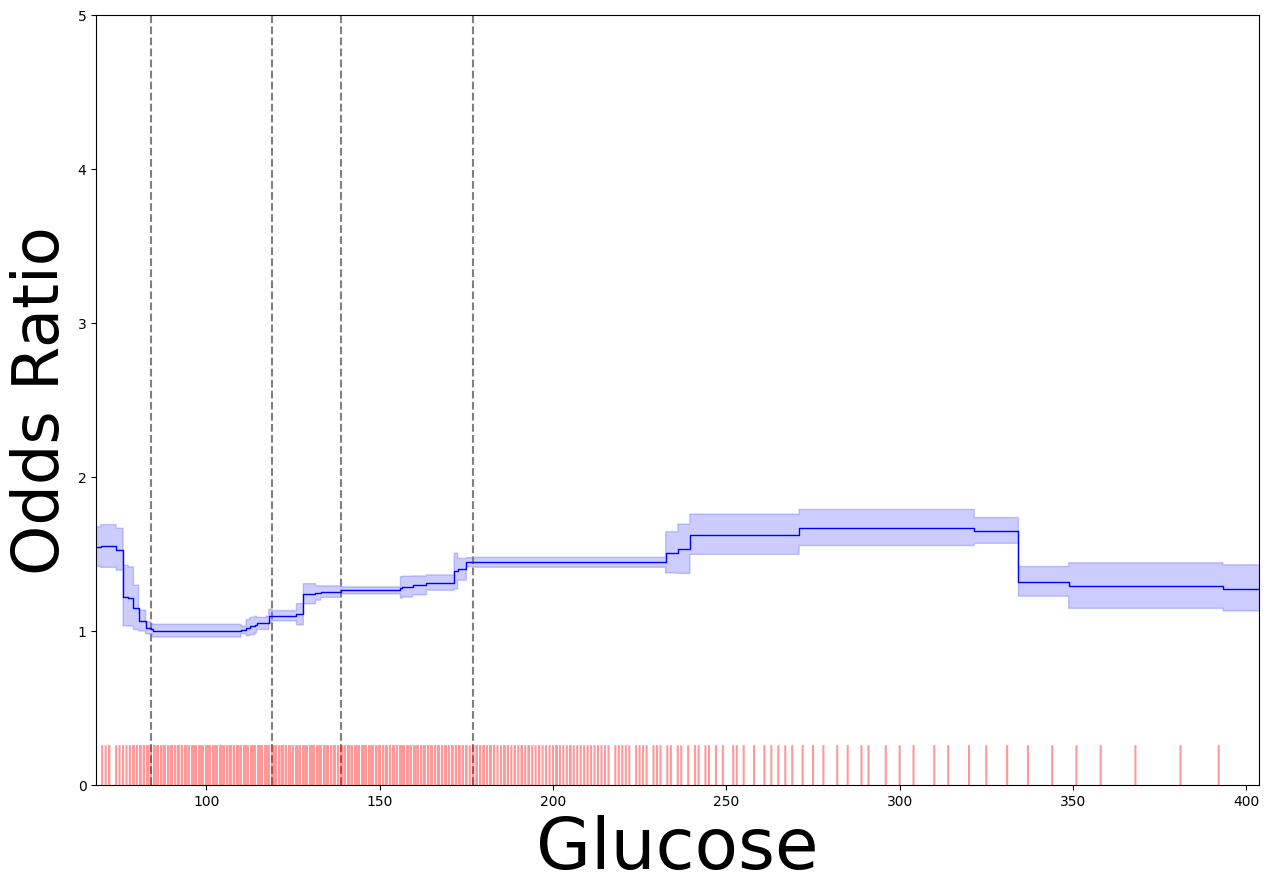

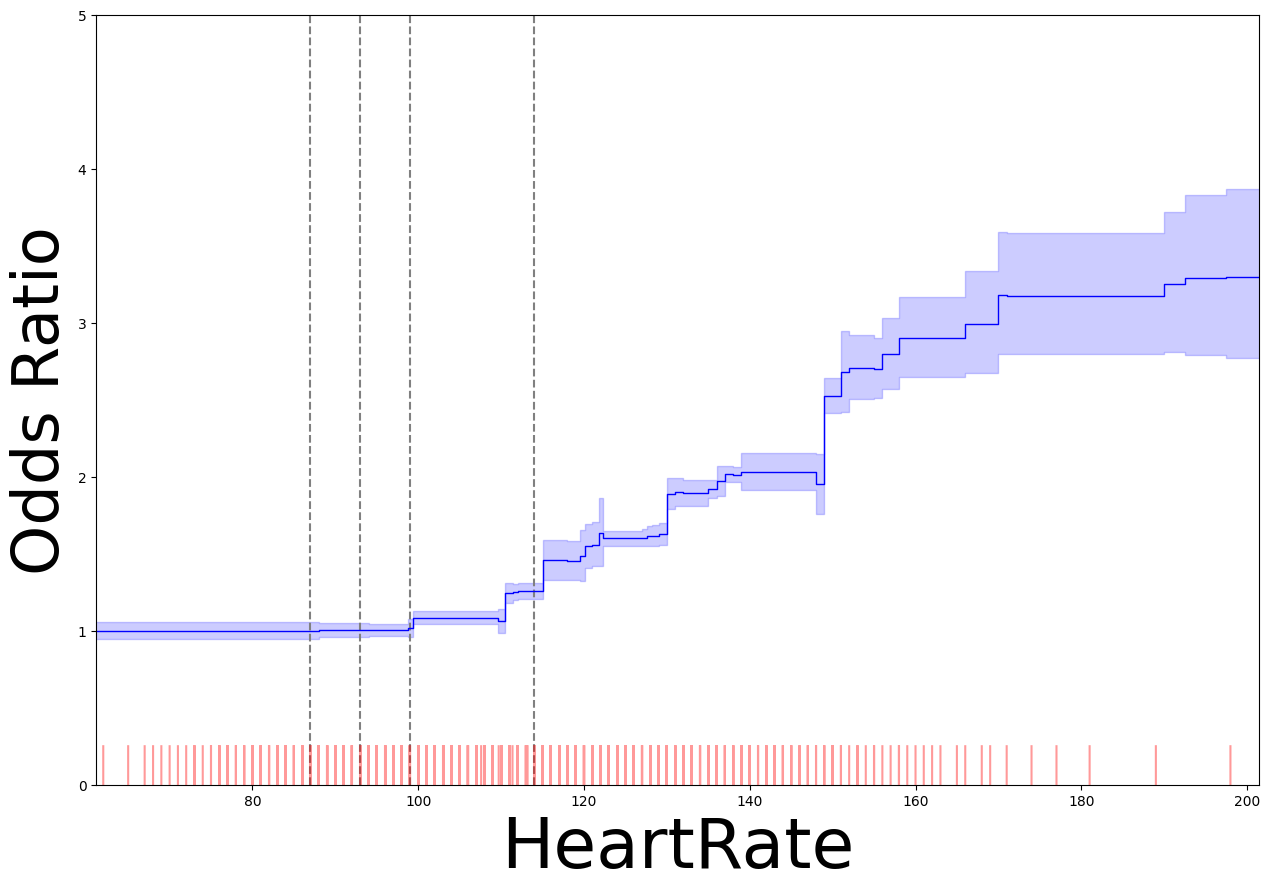

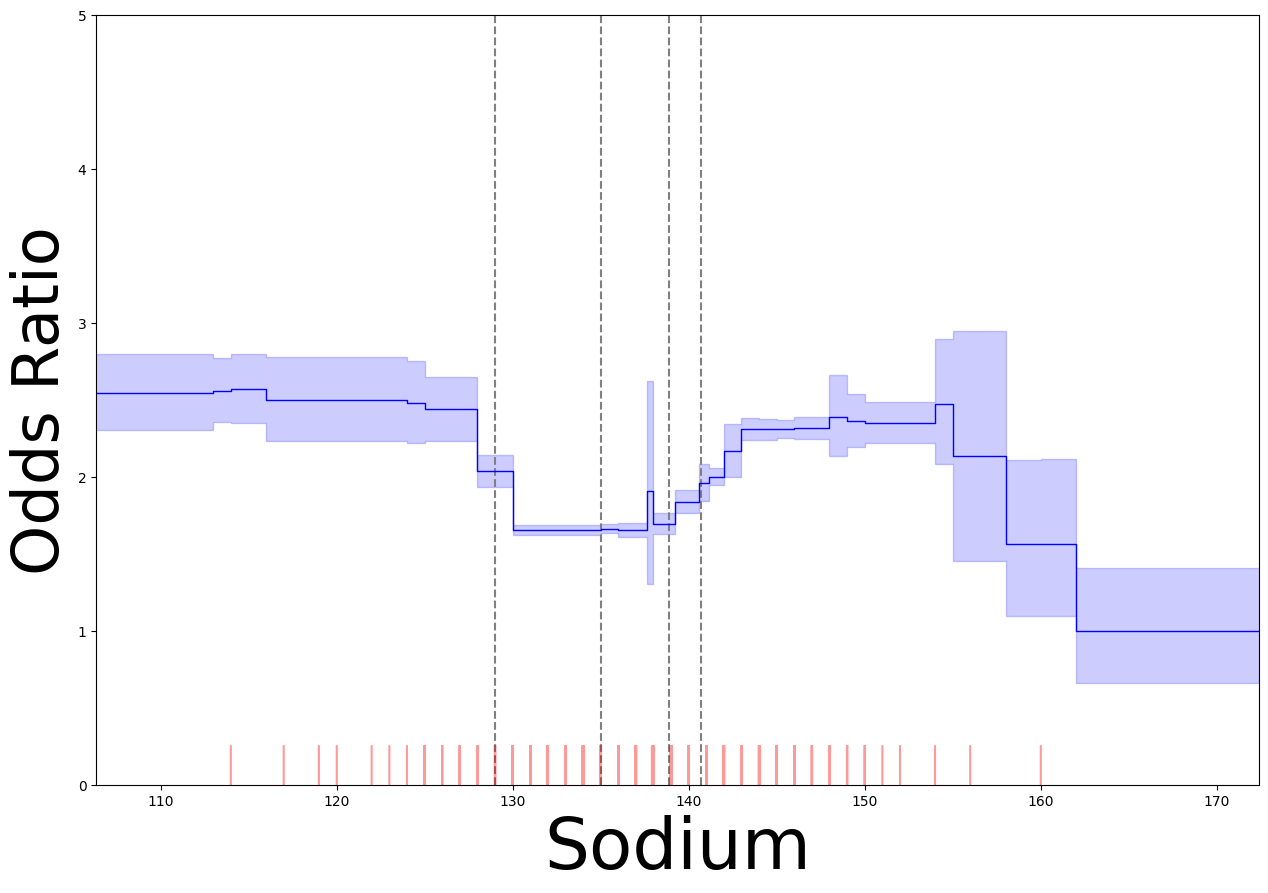

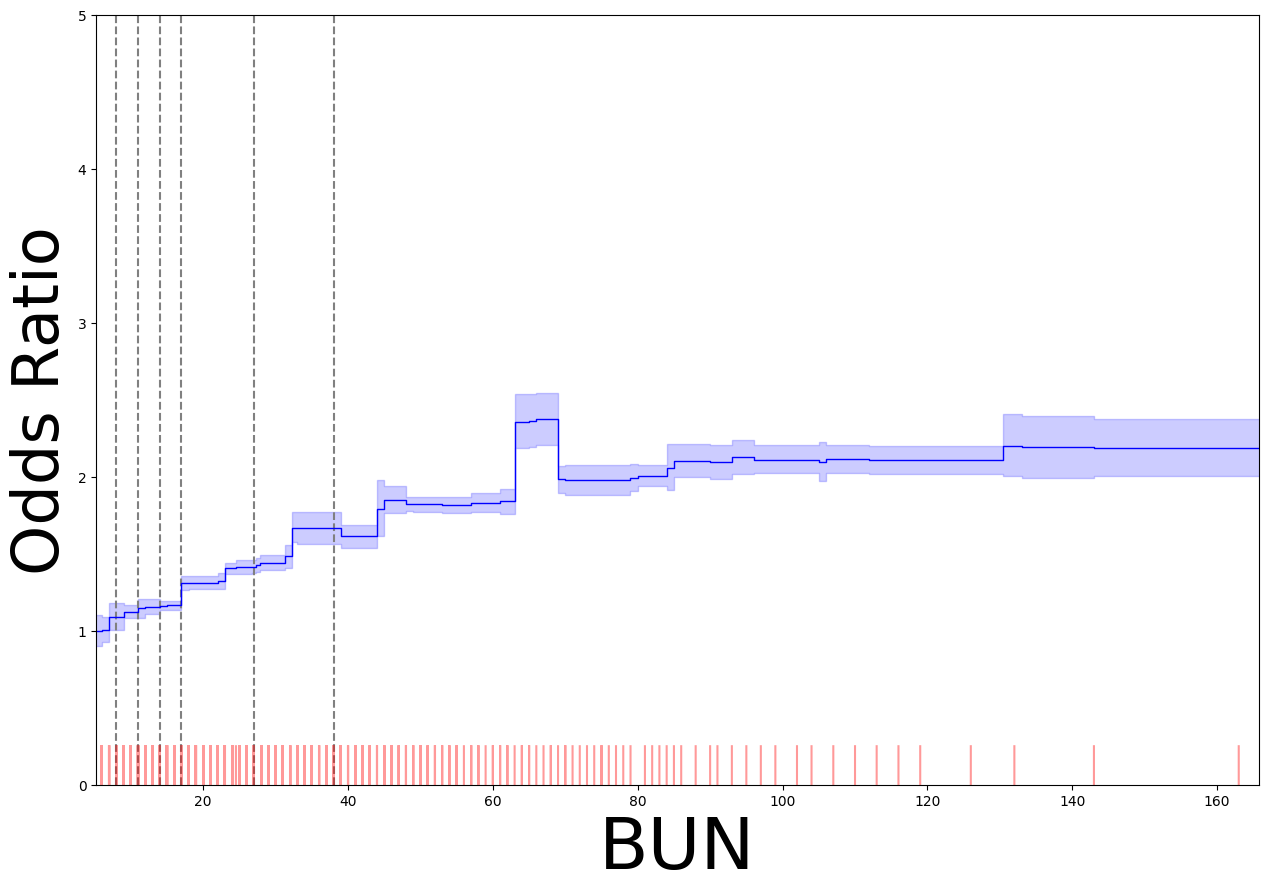

In [7]:
disc = find_and_plot_discontinuities(mimic3_X_sel, mimic3_Y,
                                                min_samples=2000,
                                                min_effect_size=1.1)

## MIMIV-IV

In [6]:
ebms["mimic4"], ebm_globals["mimic4"] = run_experiment(mimic4_X_sel, mimic4_Y)

XGB-1
AUC	Train:0.75
AUC	Test:0.74
APS	Train:0.25
APS	Test:0.24
F1	Train:0.10
F1	Test:0.10
XGB-2
AUC	Train:0.81
AUC	Test:0.75
APS	Train:0.42
APS	Test:0.27
F1	Train:0.29
F1	Test:0.17
XGB-3
AUC	Train:0.85
AUC	Test:0.73
APS	Train:0.56
APS	Test:0.25
F1	Train:0.48
F1	Test:0.20
MLP
AUC	Train:0.73
AUC	Test:0.73
APS	Train:0.26
APS	Test:0.25
F1	Train:0.14
F1	Test:0.13
EBM
AUC	Train:0.75
AUC	Test:0.74
APS	Train:0.25
APS	Test:0.24
F1	Train:0.08
F1	Test:0.07
Calibrated EBM
AUC	Train:0.75
AUC	Test:0.75
APS	Train:0.25
APS	Test:0.26
F1	Train:0.08
F1	Test:0.08


,Feature,Value
0,SBP,81.0
1,Chloride,115.0
2,Creatinine,3.5
3,Magnesium,2.6
4,Platelet,16.0
5,Potassium,6.7
6,Temp,35.0


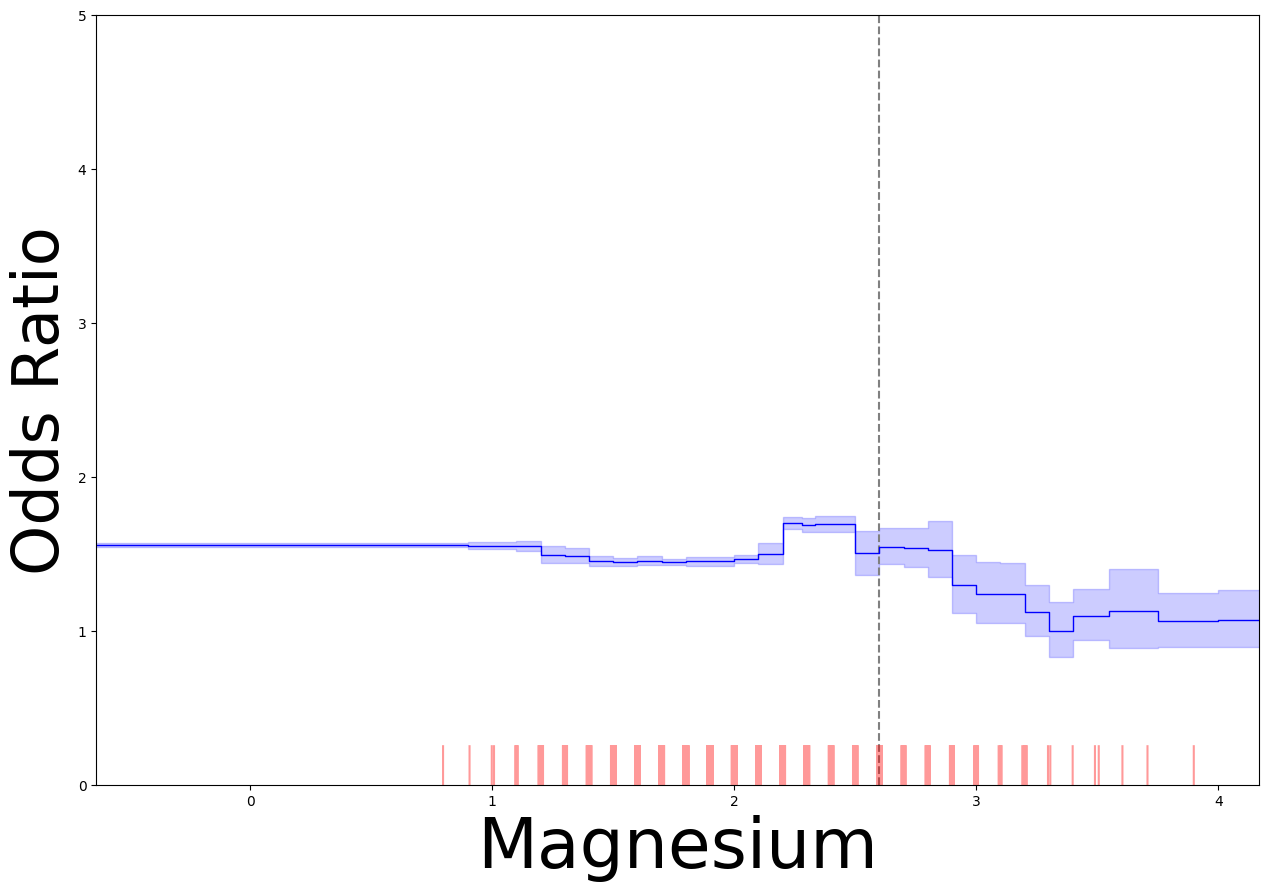

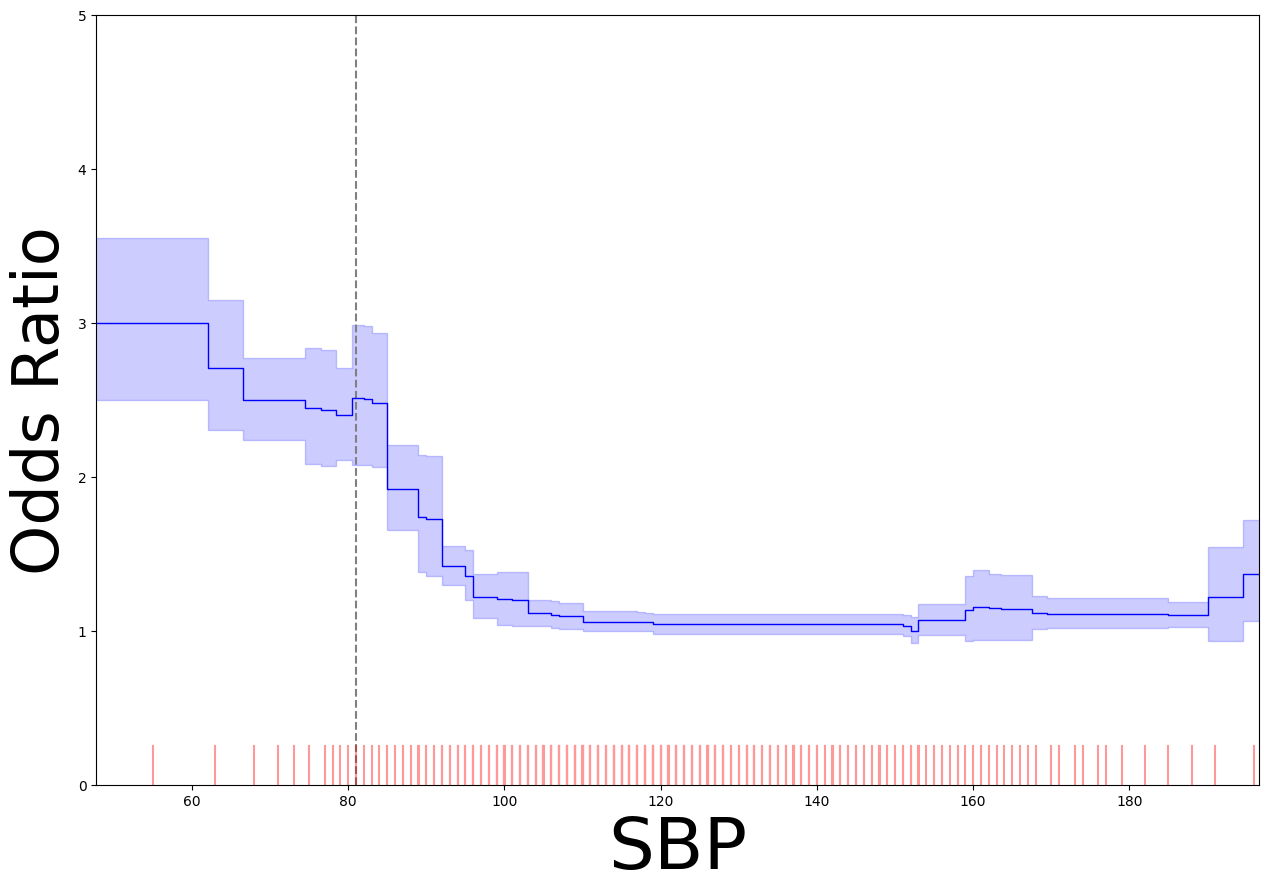

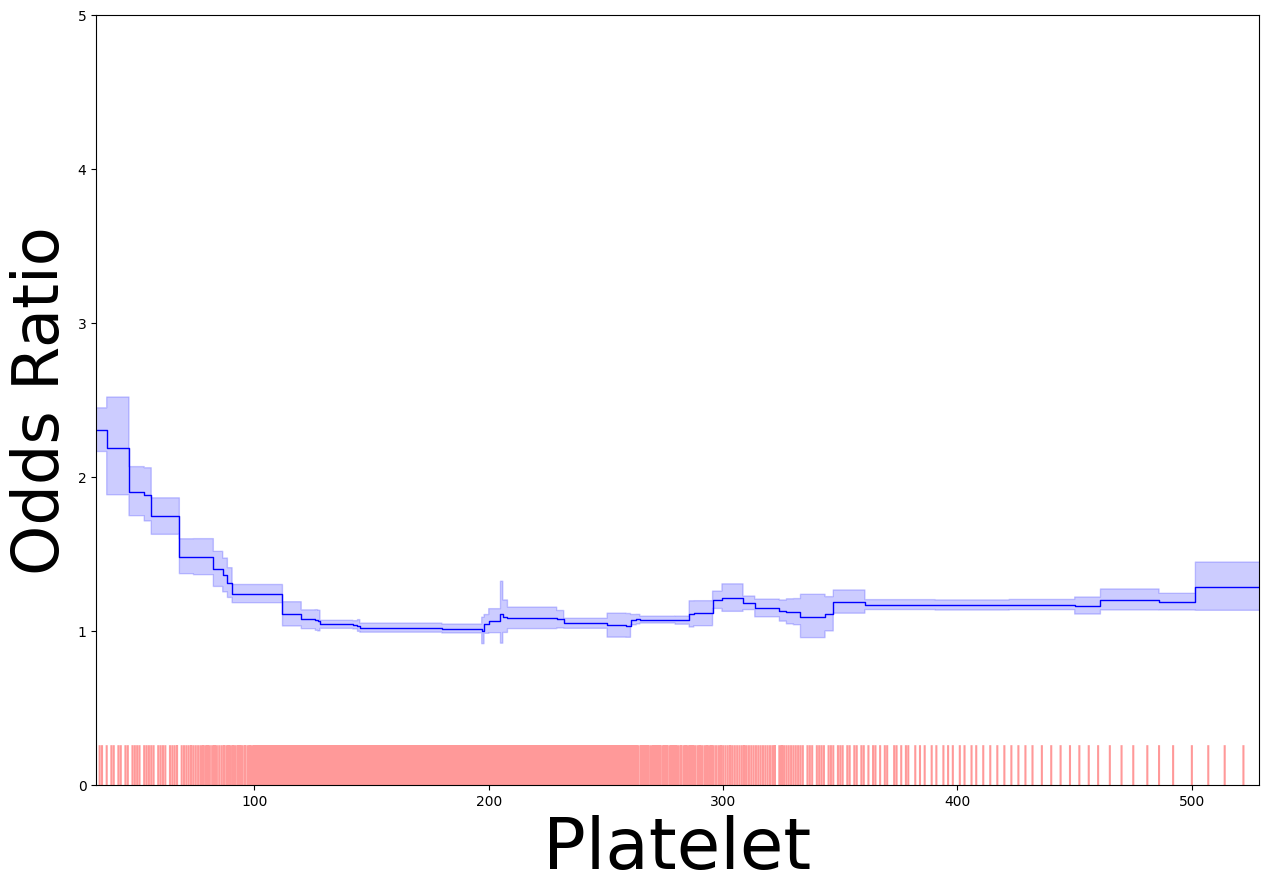

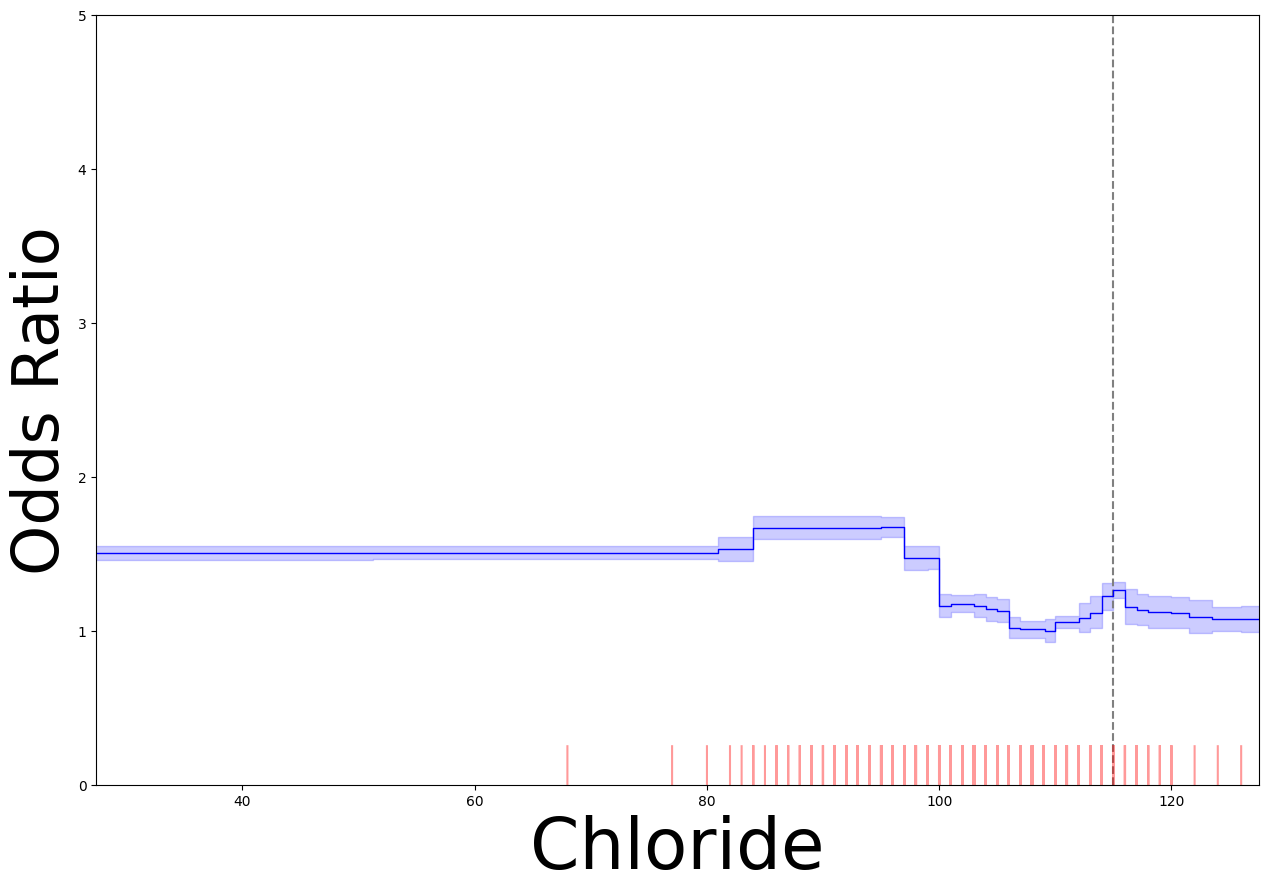

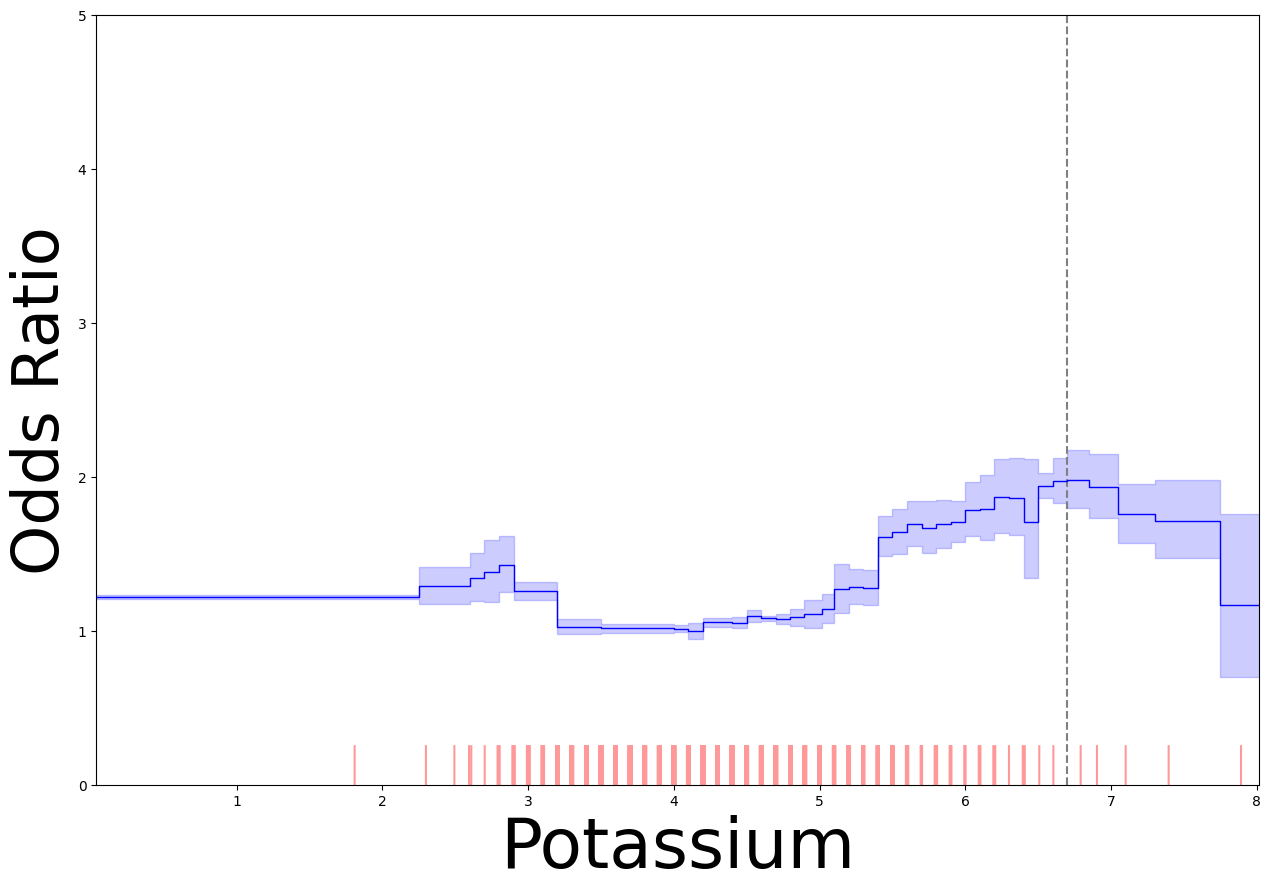

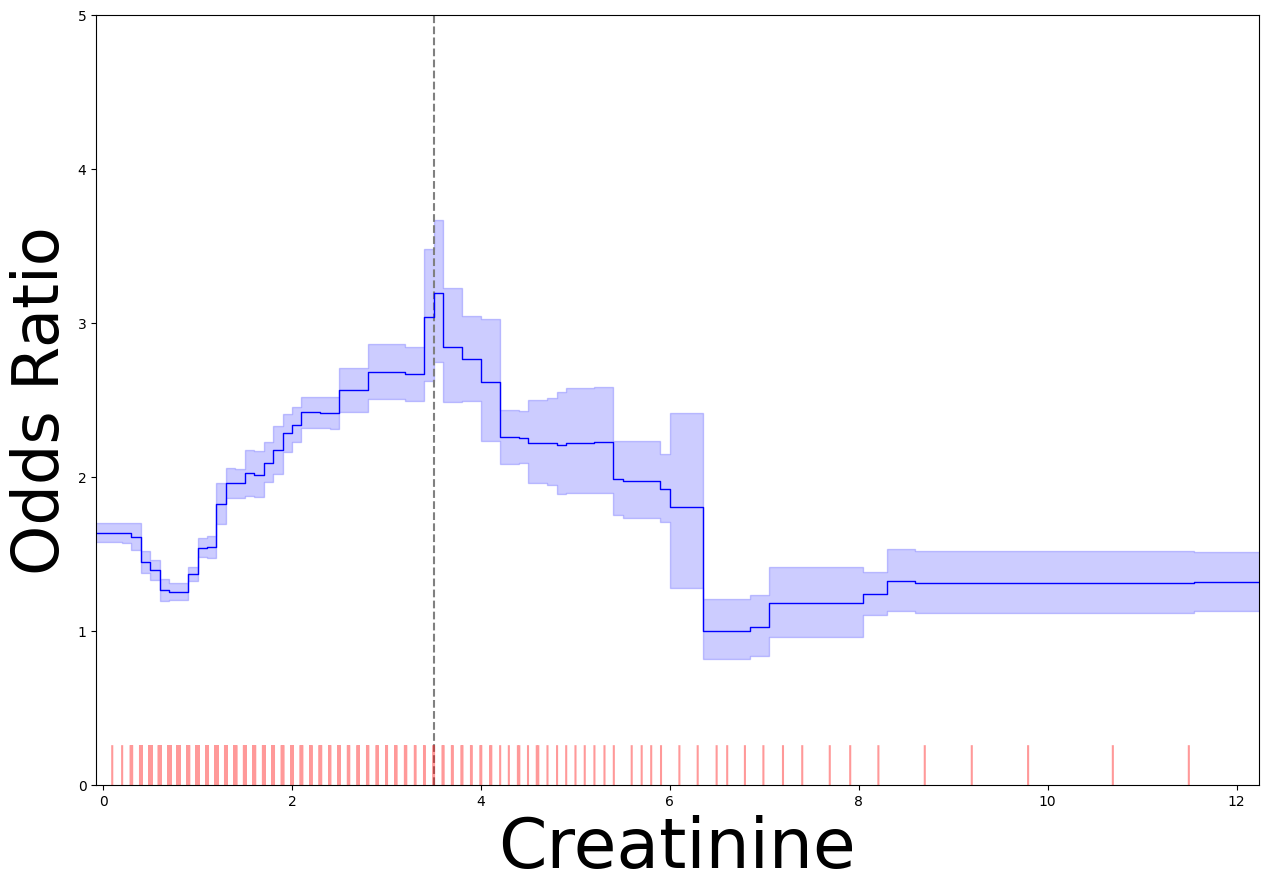

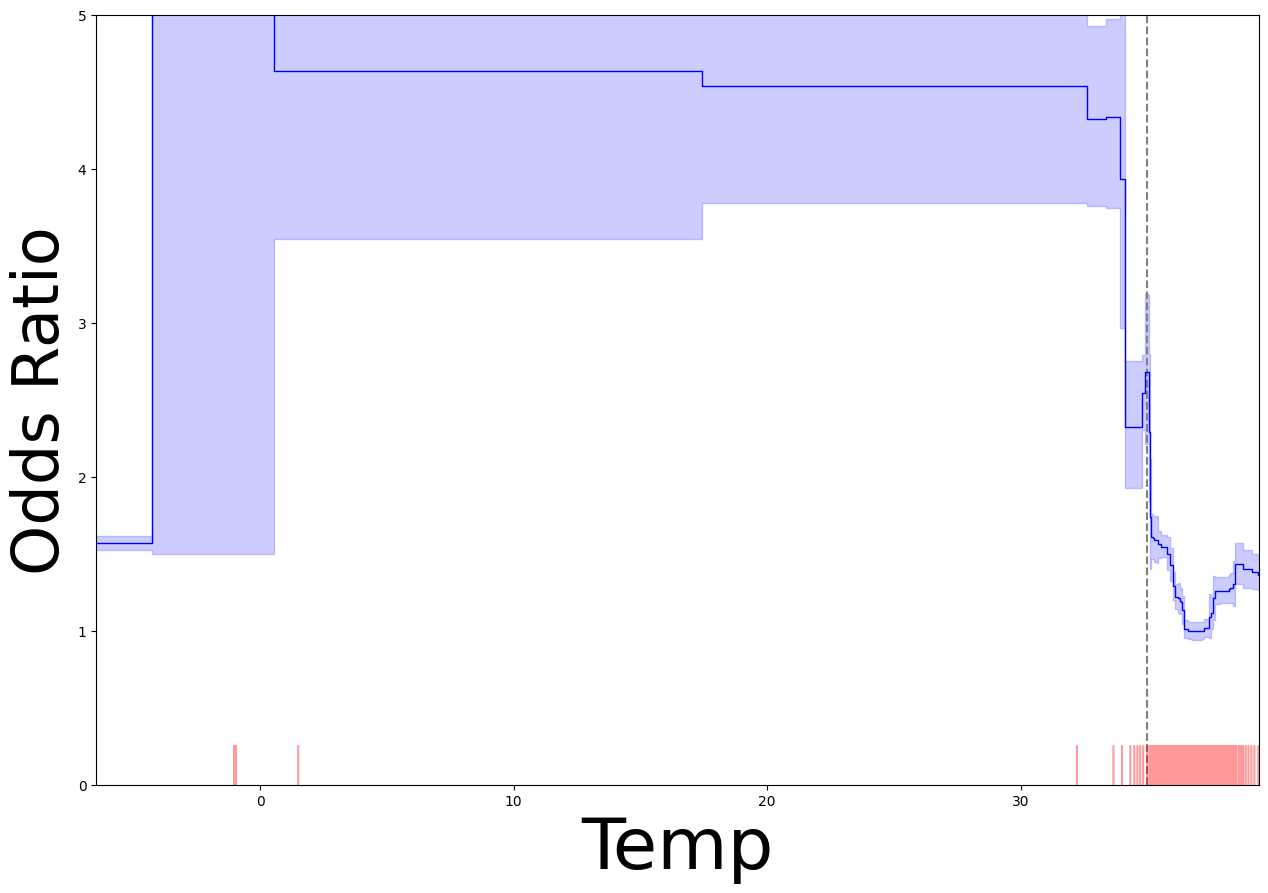

In [8]:
find_and_plot_non_monotonicities(mimic4_X_sel, mimic4_Y.values,
                                 prob_threshold=0.1, counter_causal_only=True)

,Feature,Value,# Samples,Effect Size,P-Ratio
71,Glucose,106.000000,5268.0,1.205830,986.0
70,Glucose,99.000000,7978.0,1.111032,840.0
5,Age,50.000000,4503.0,1.199735,820.0
24,Age,78.000000,5824.0,1.146653,797.0
45,SBP,109.990626,2411.0,1.344103,712.9968418925698
73,Glucose,122.000000,3851.0,1.182639,646.0
31,Age,90.000000,3702.0,1.188723,640.0
46,SBP,118.991621,5728.0,2.946287,6189.366075843923
76,Glucose,174.000000,2192.0,1.273525,530.0
72,Glucose,117.000000,2396.0,1.240307,516.0


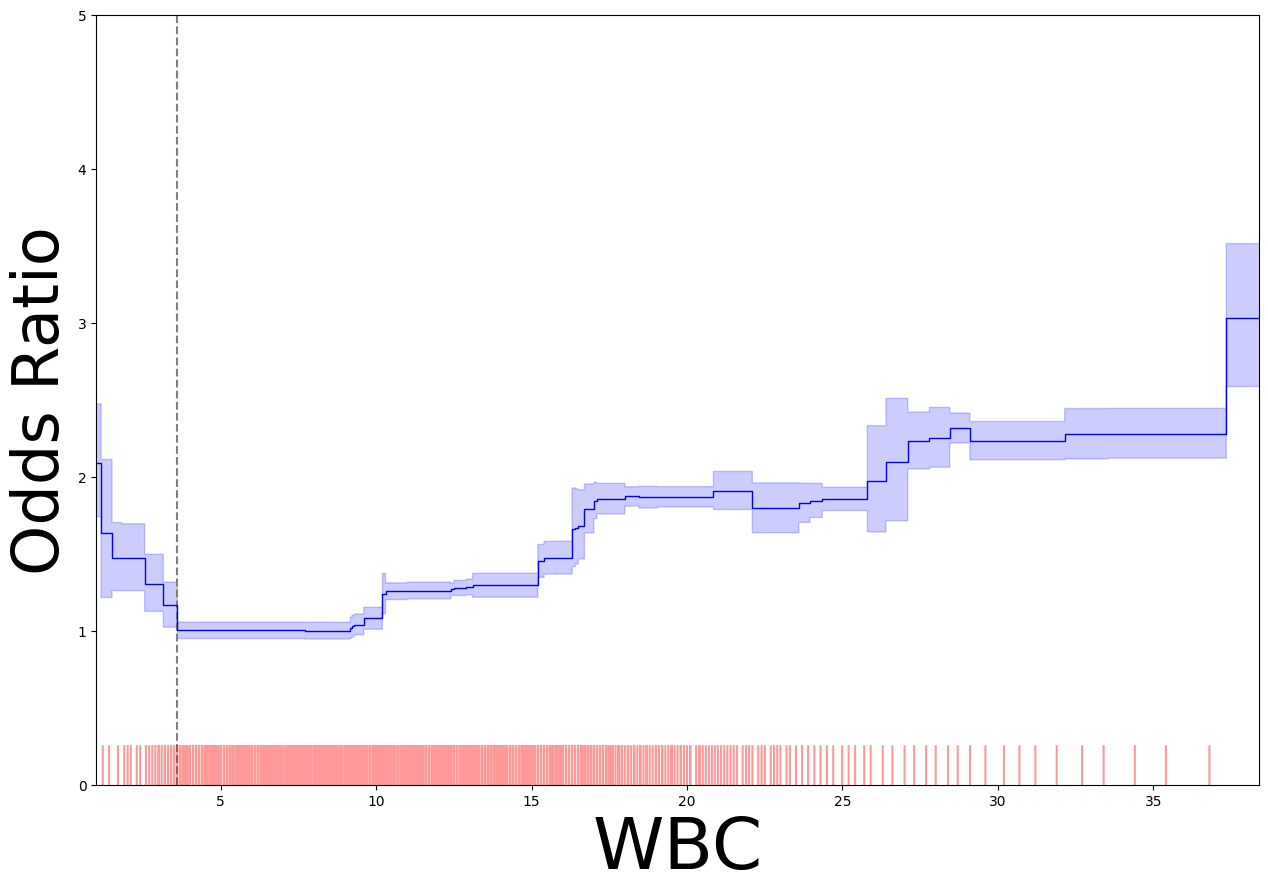

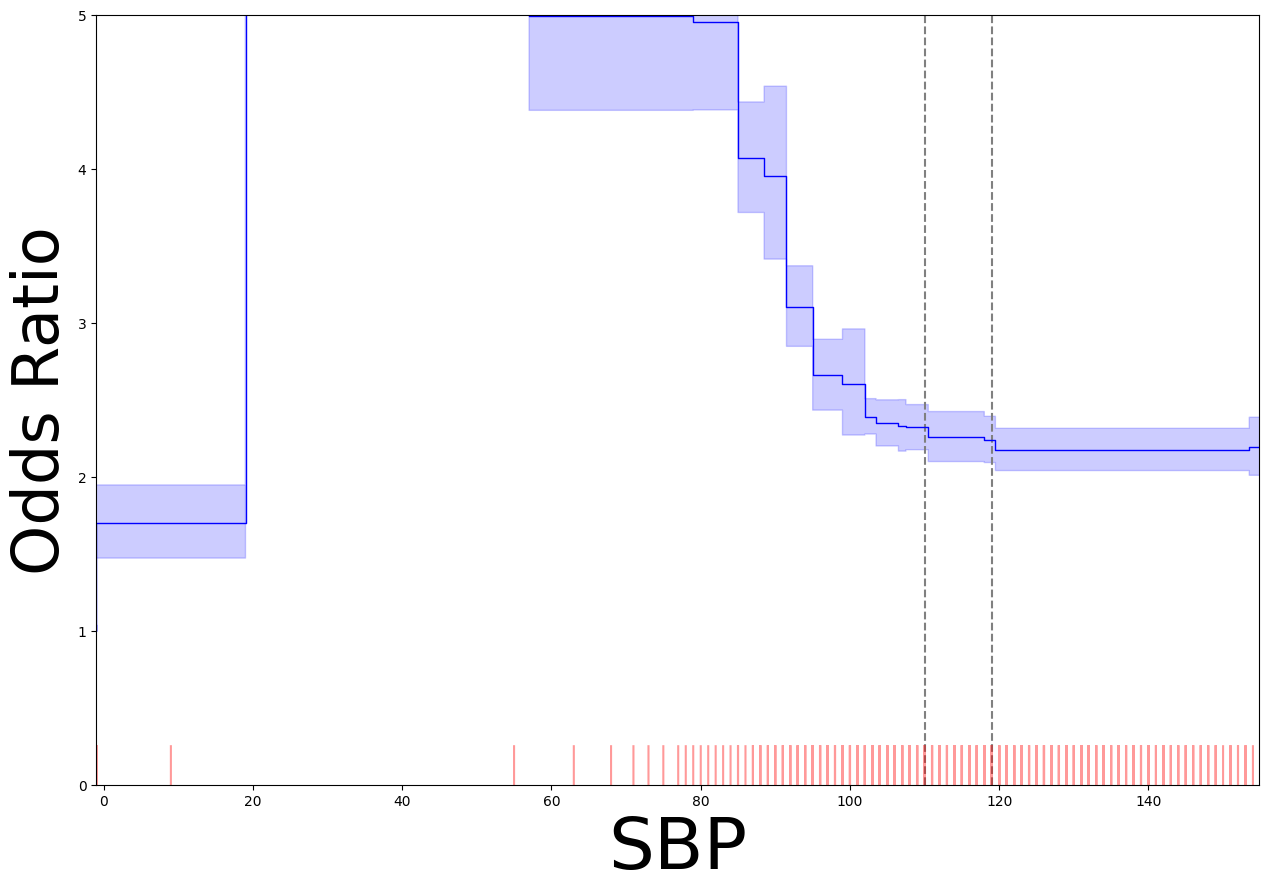

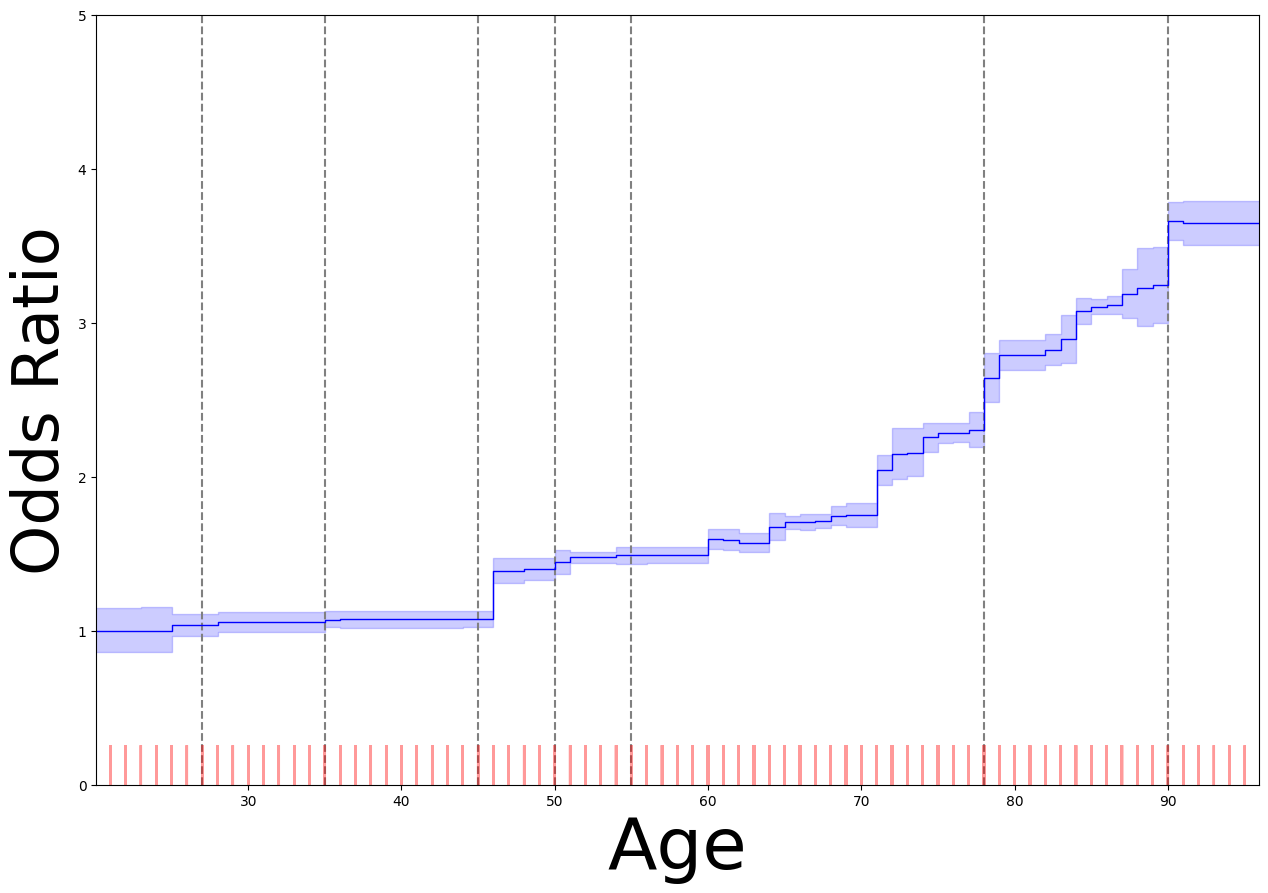

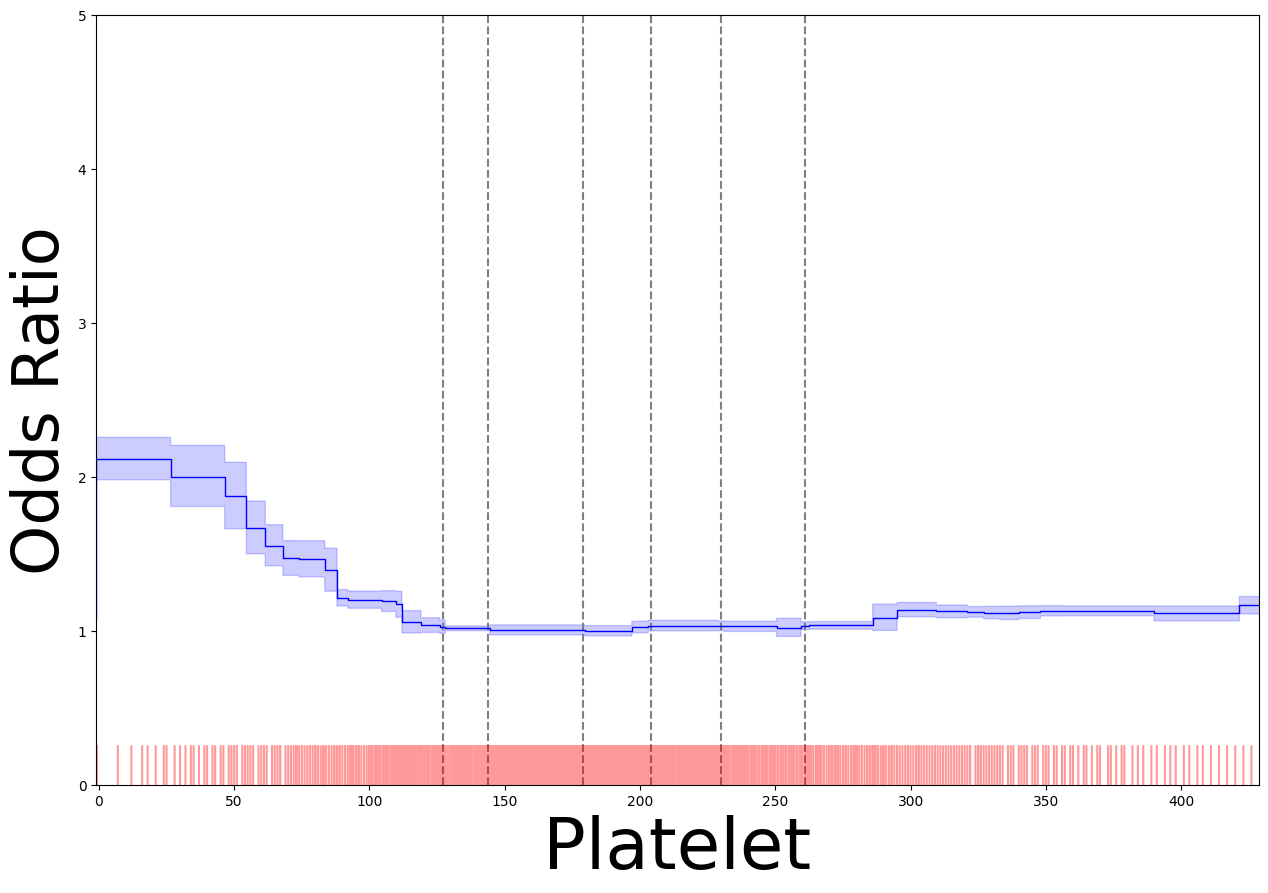

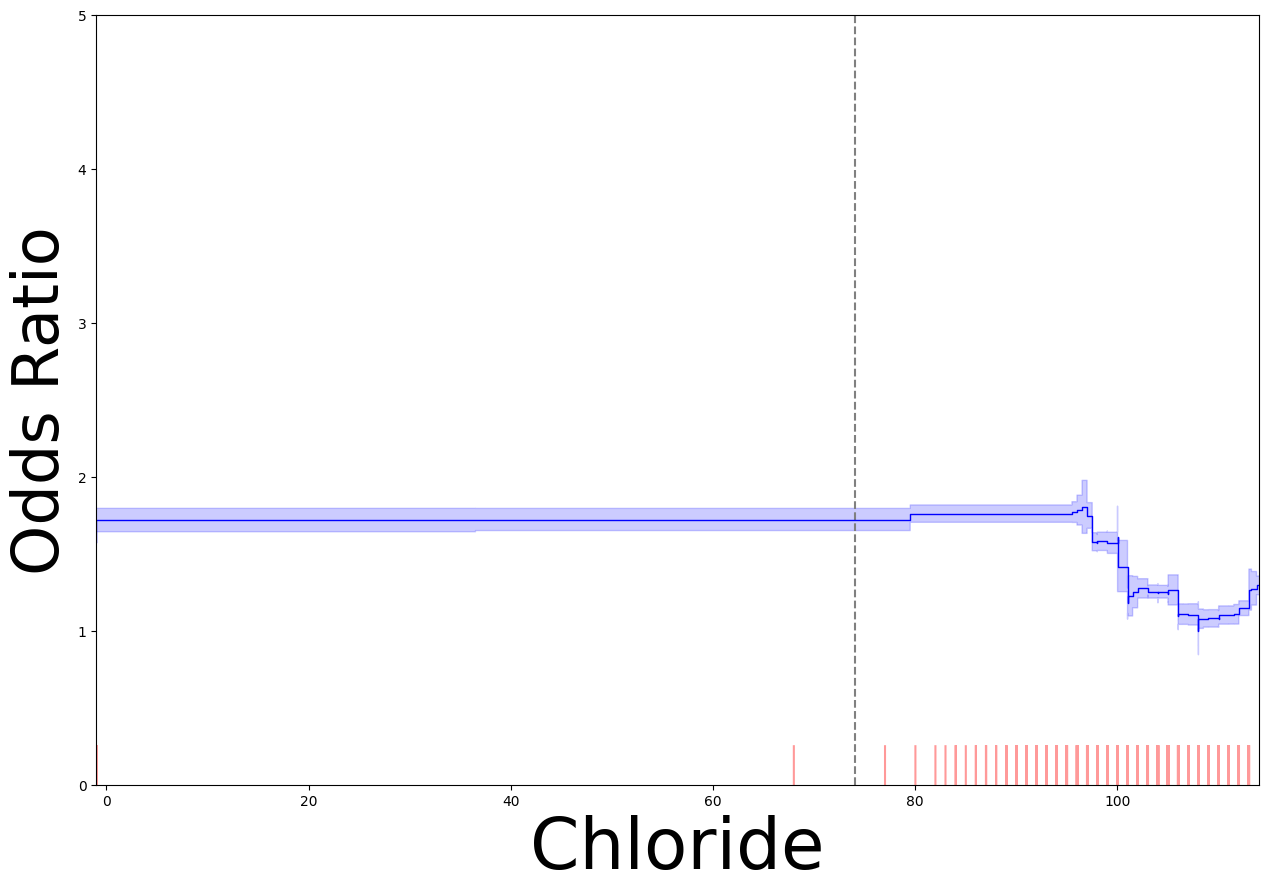

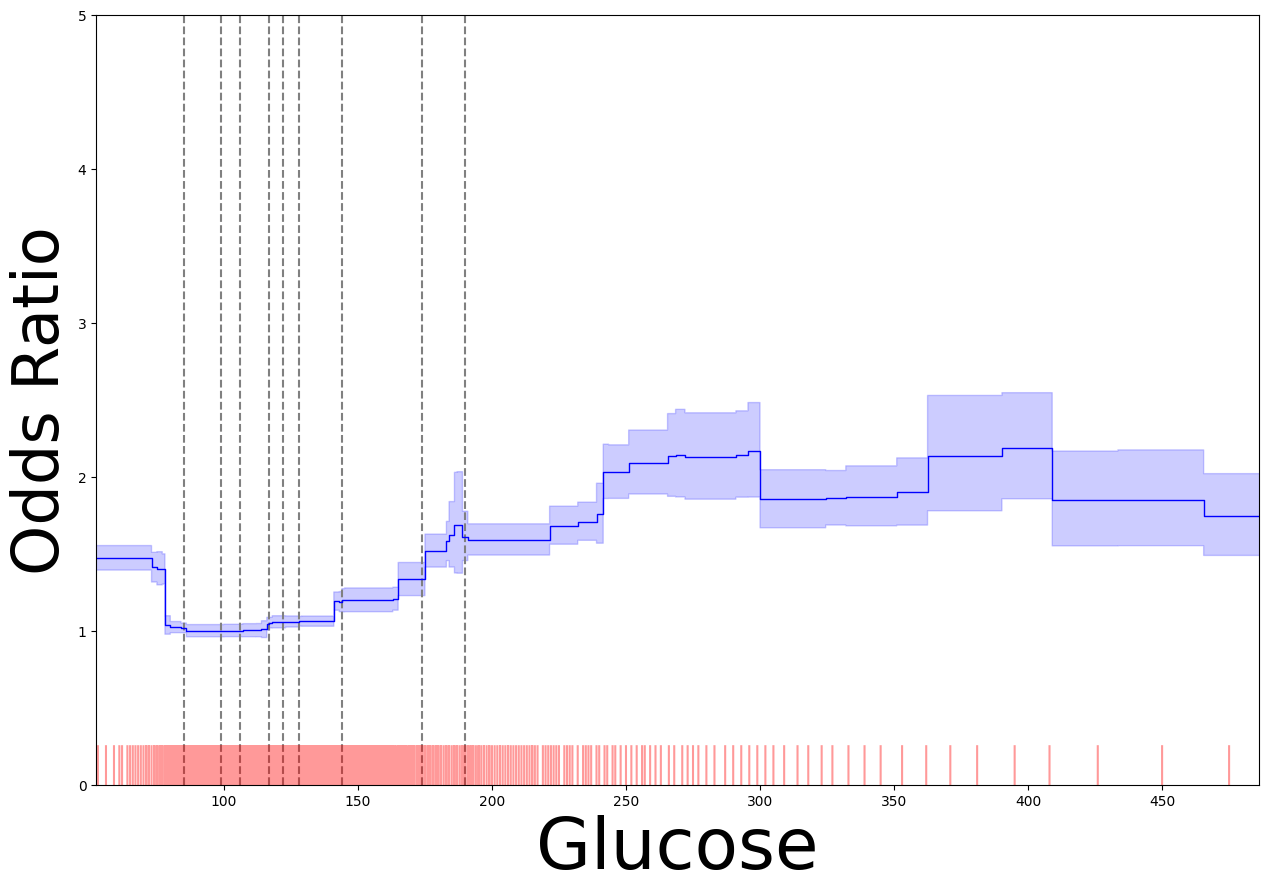

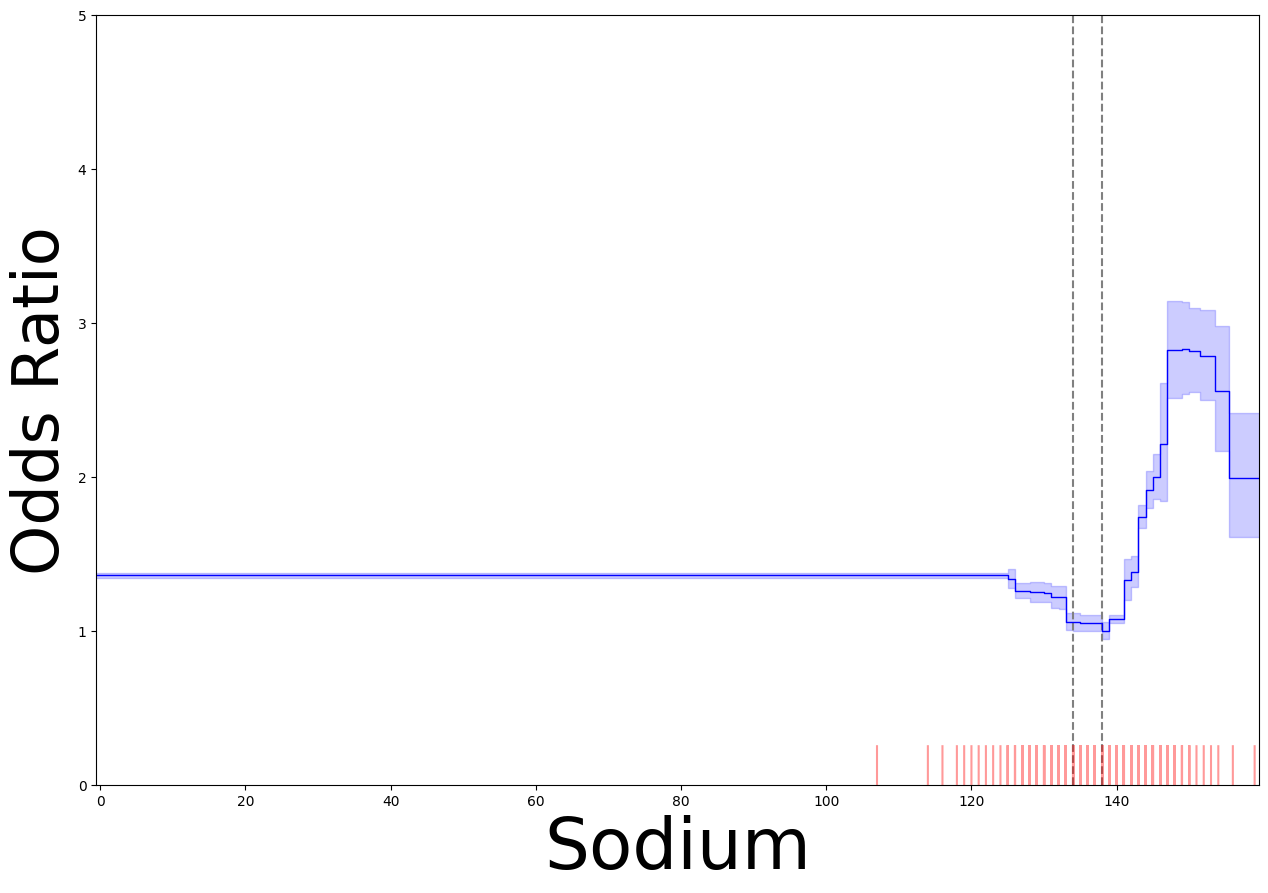

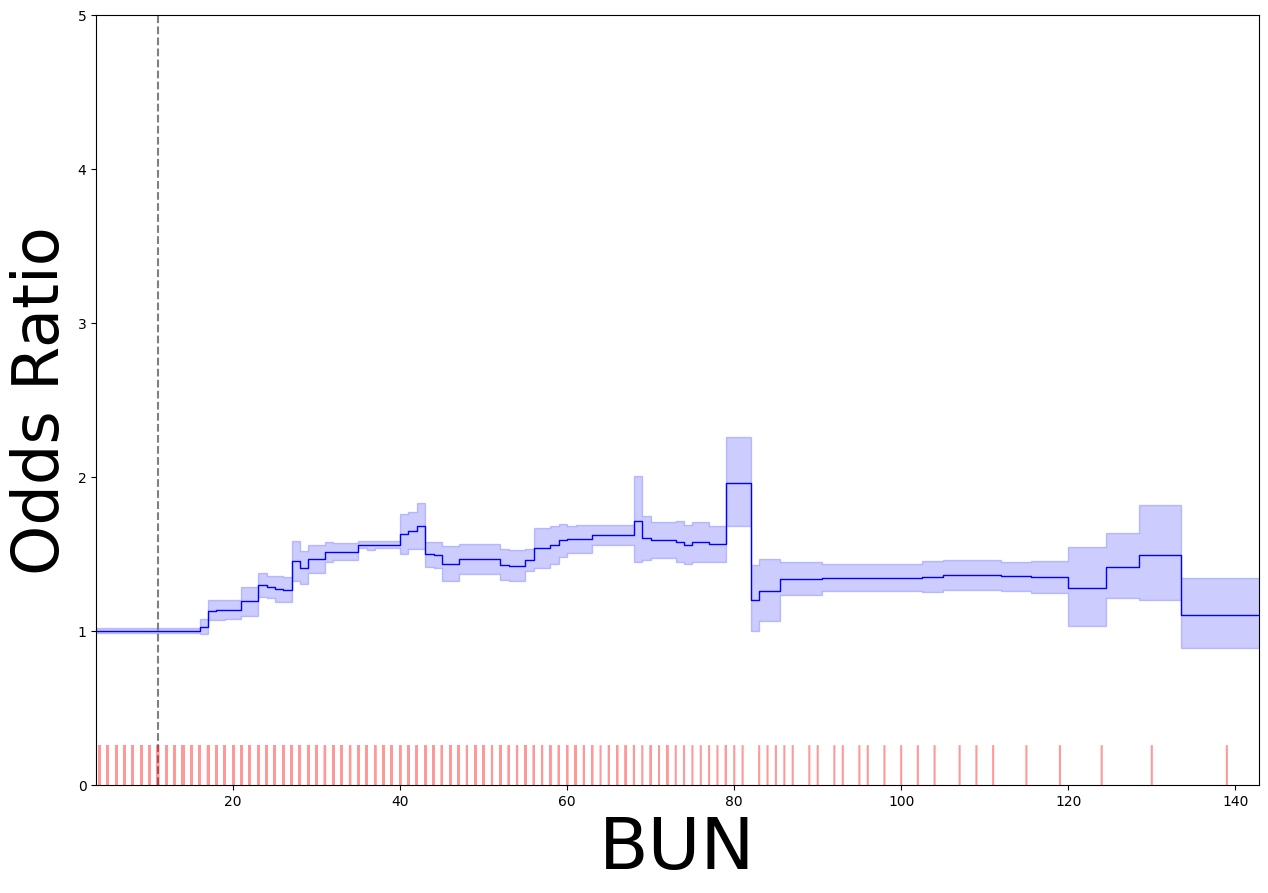

In [9]:
find_and_plot_discontinuities(mimic4_X_sel, mimic4_Y.values,
                              min_samples=2000,
                              min_effect_size=1.1)

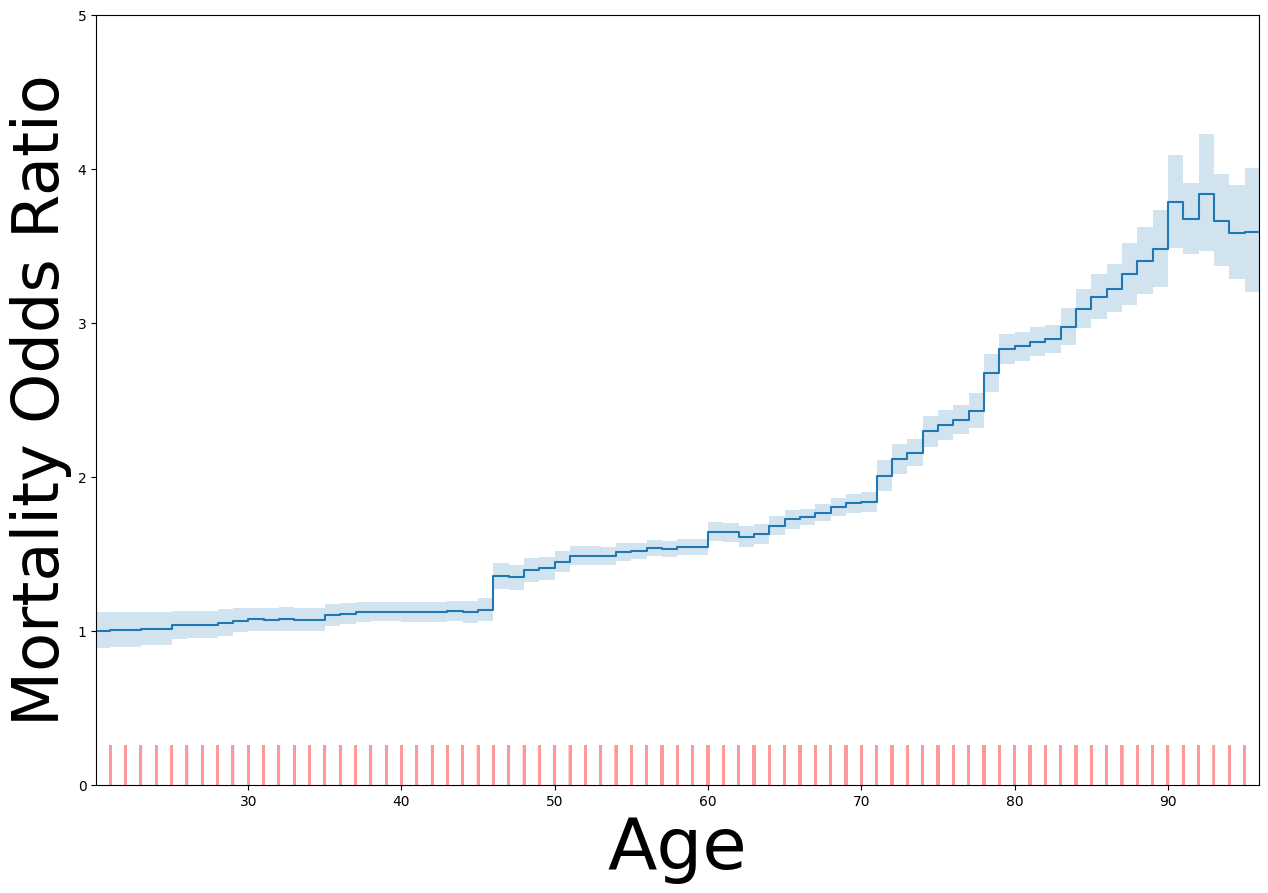

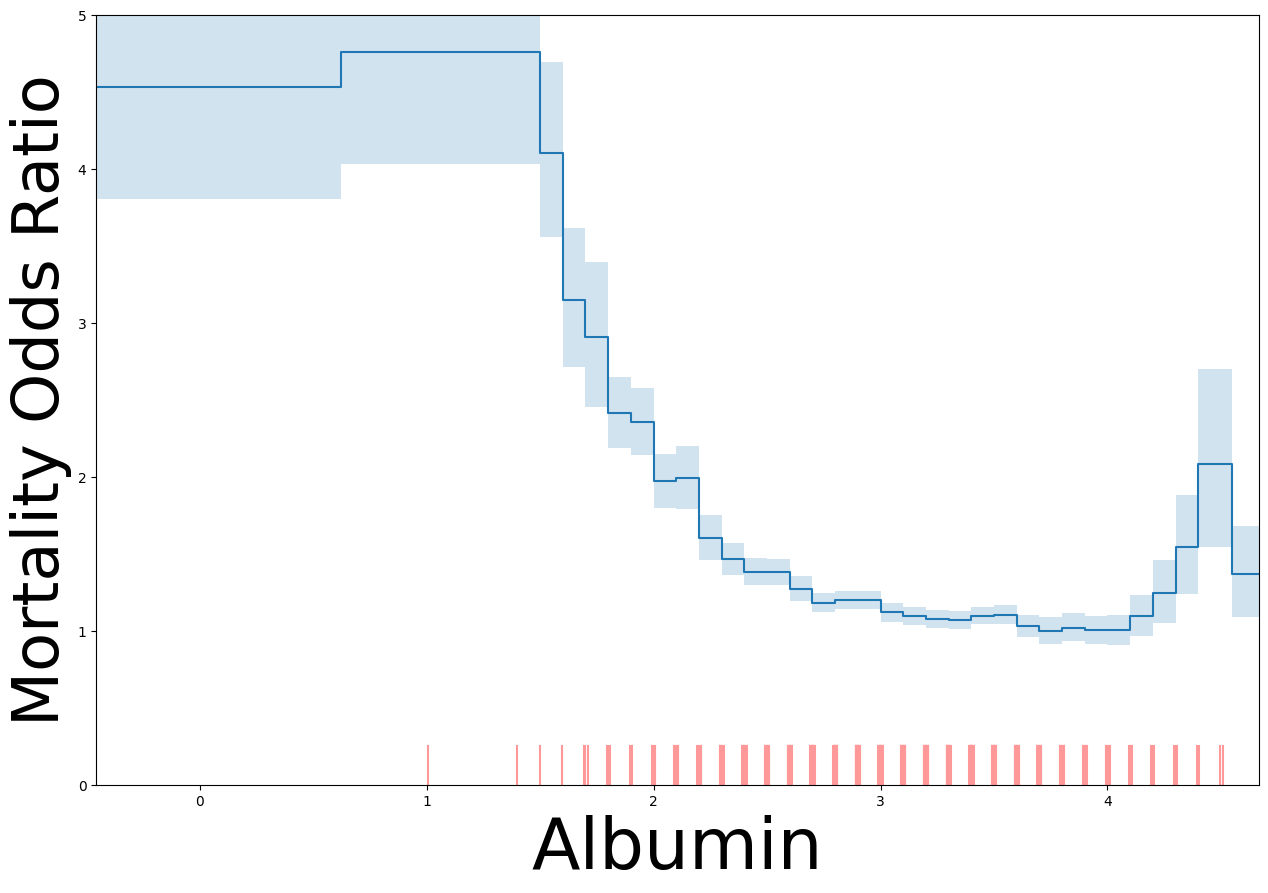

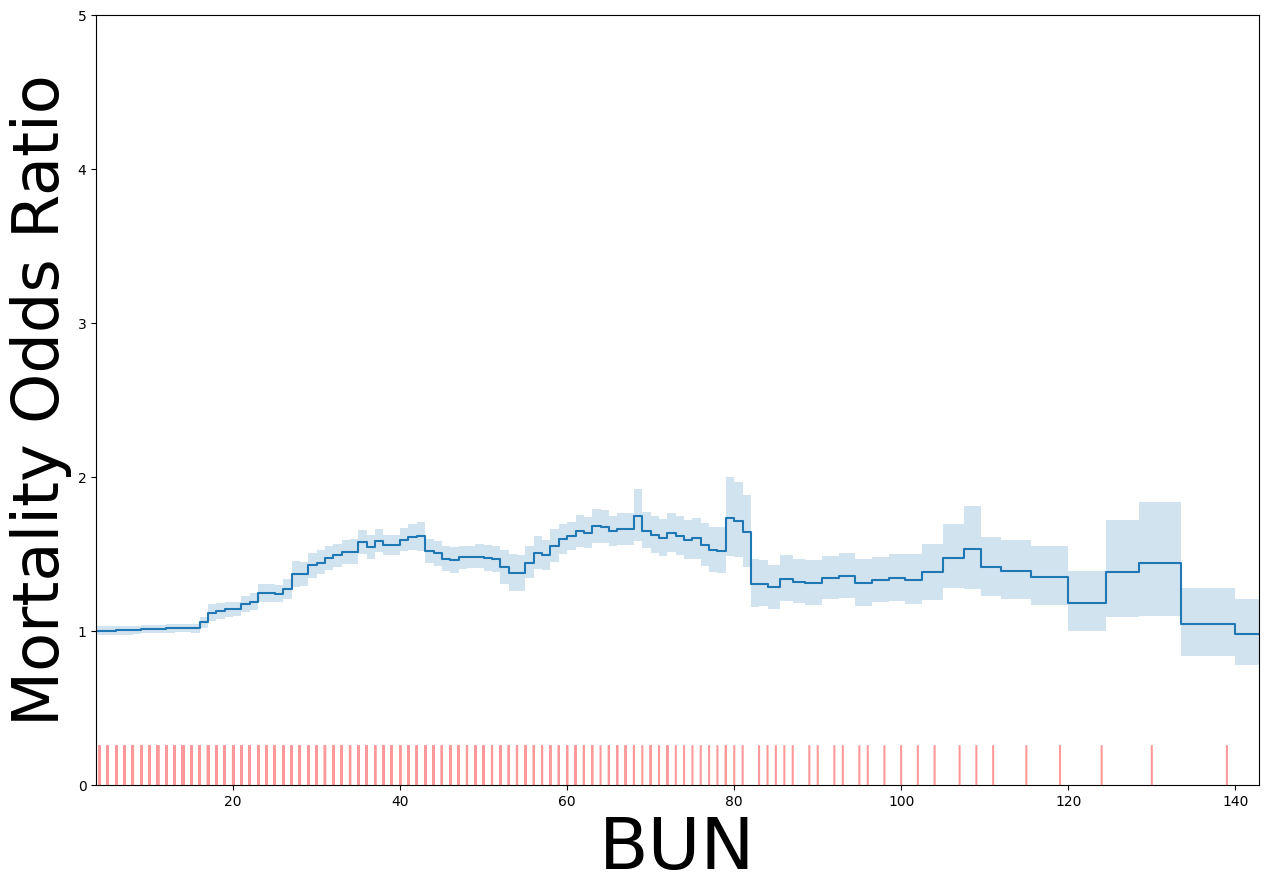

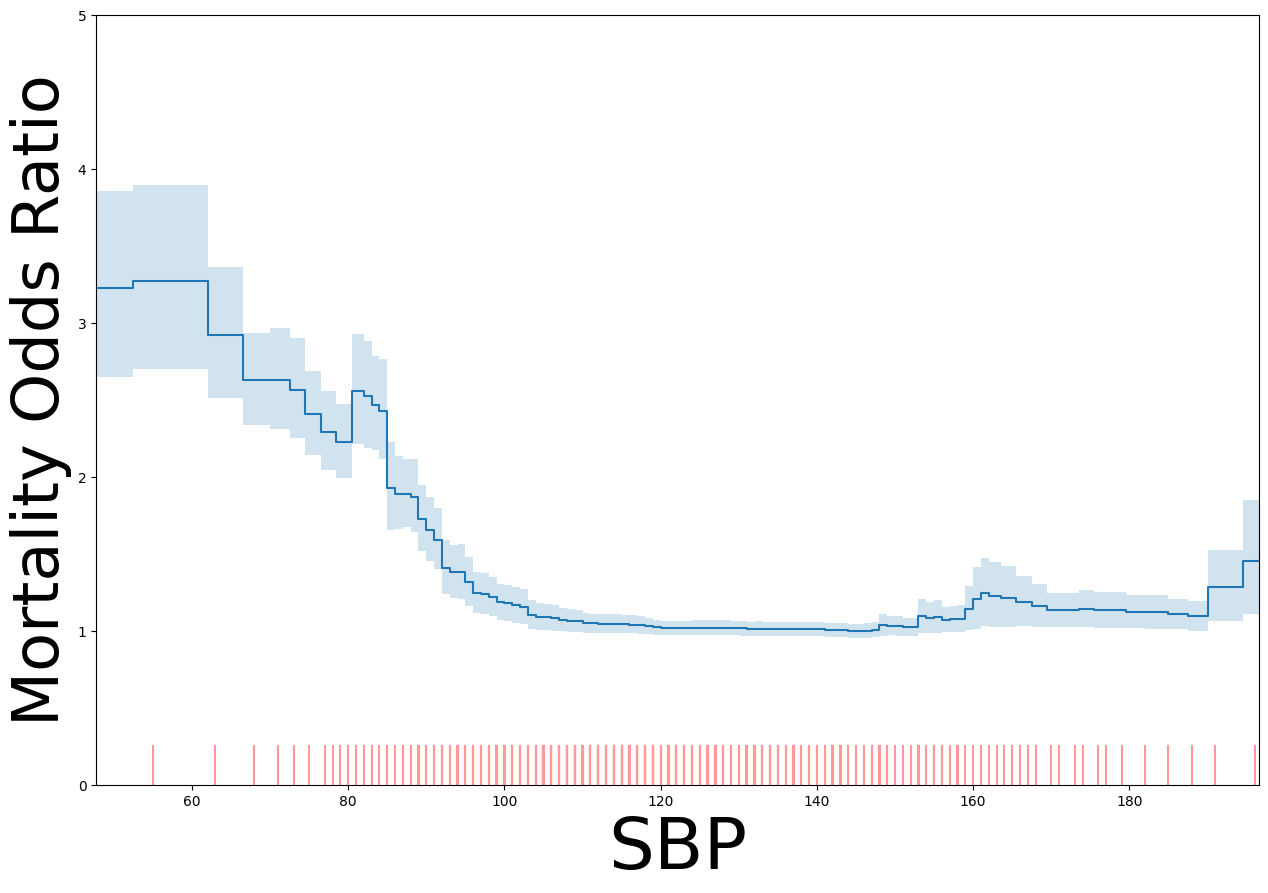

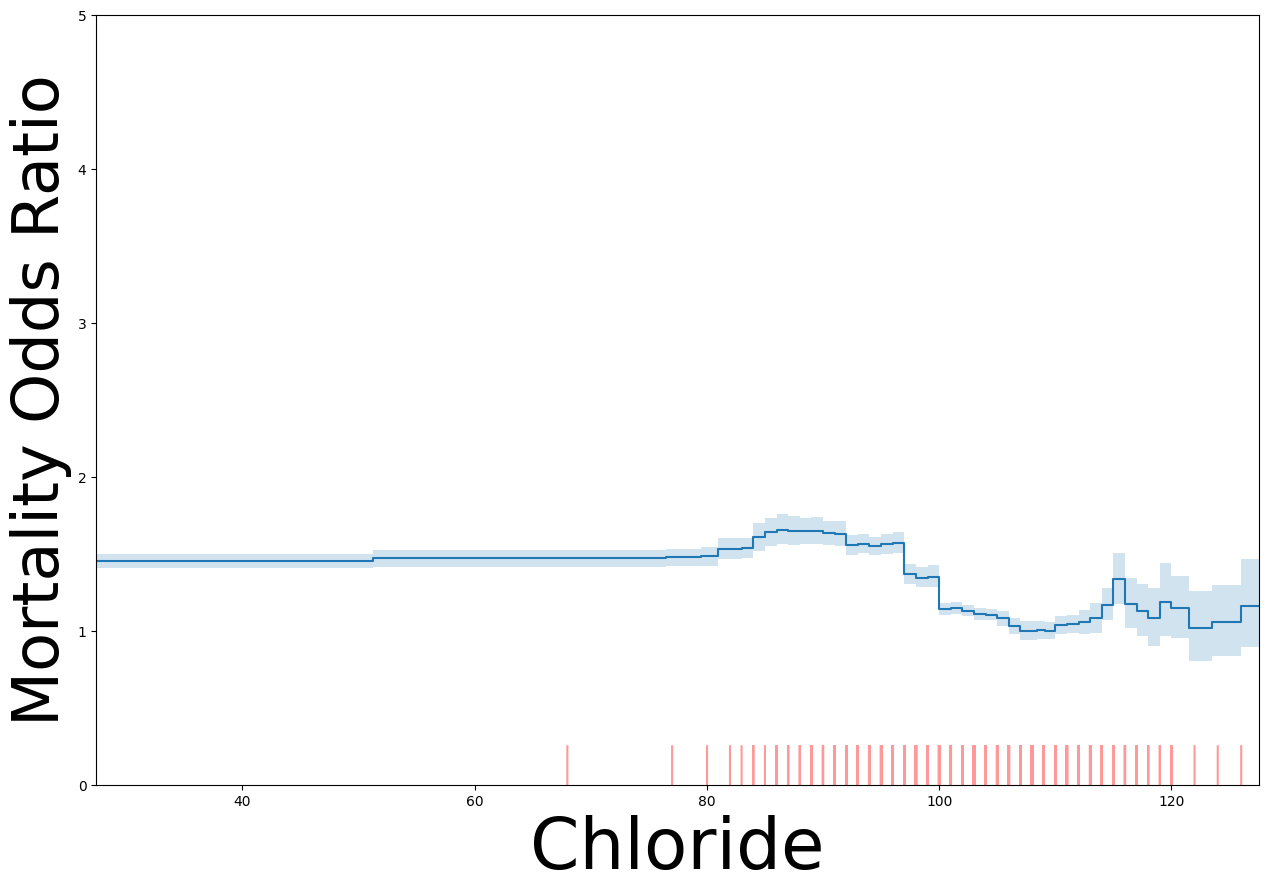

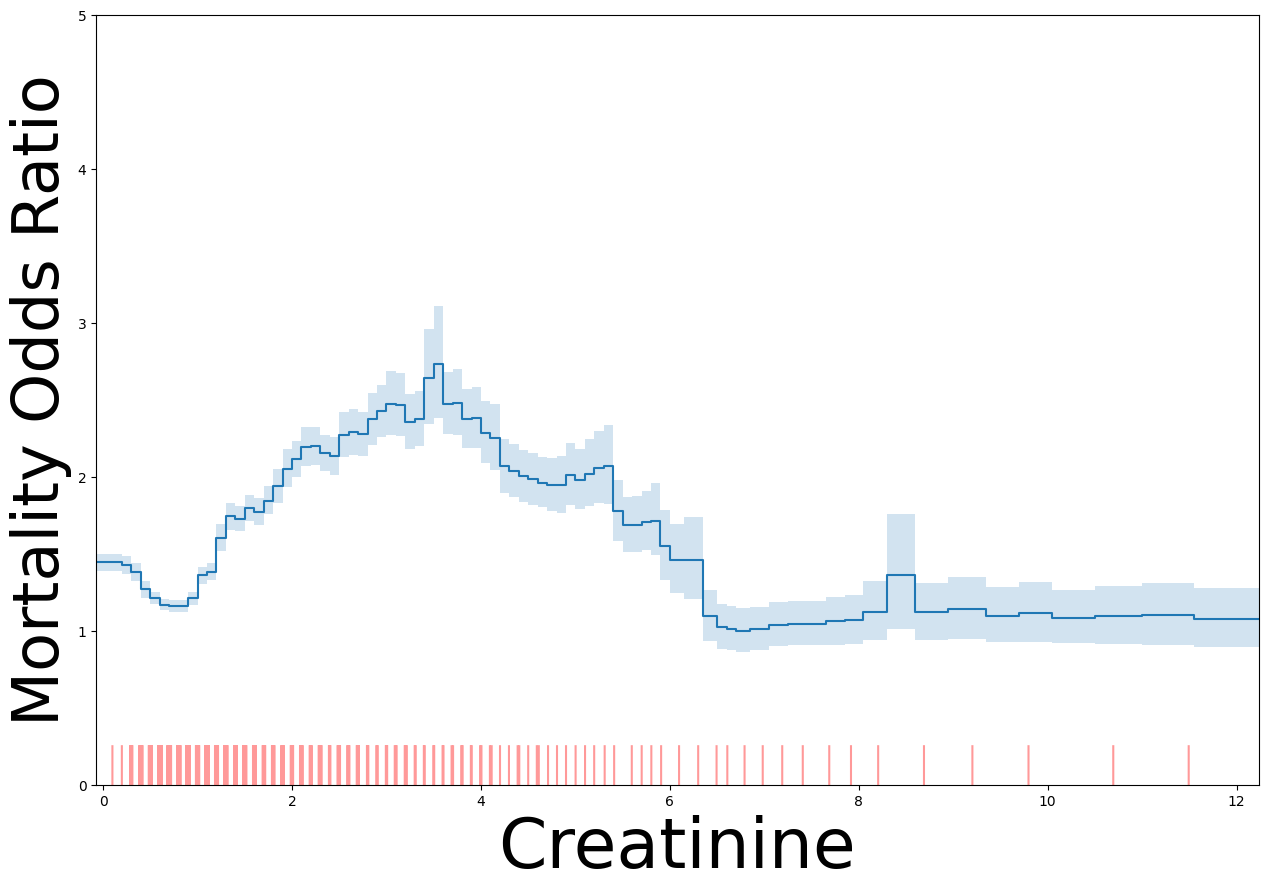

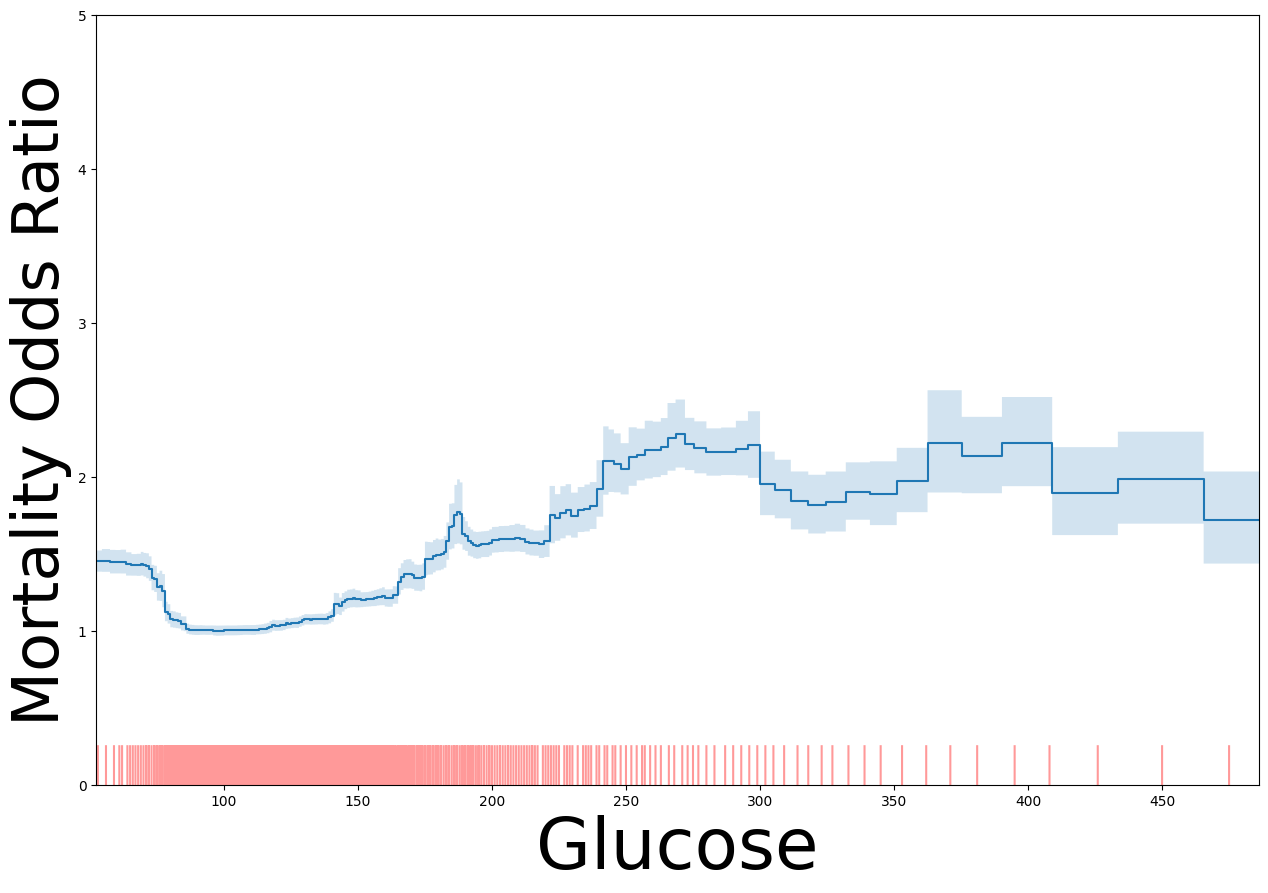

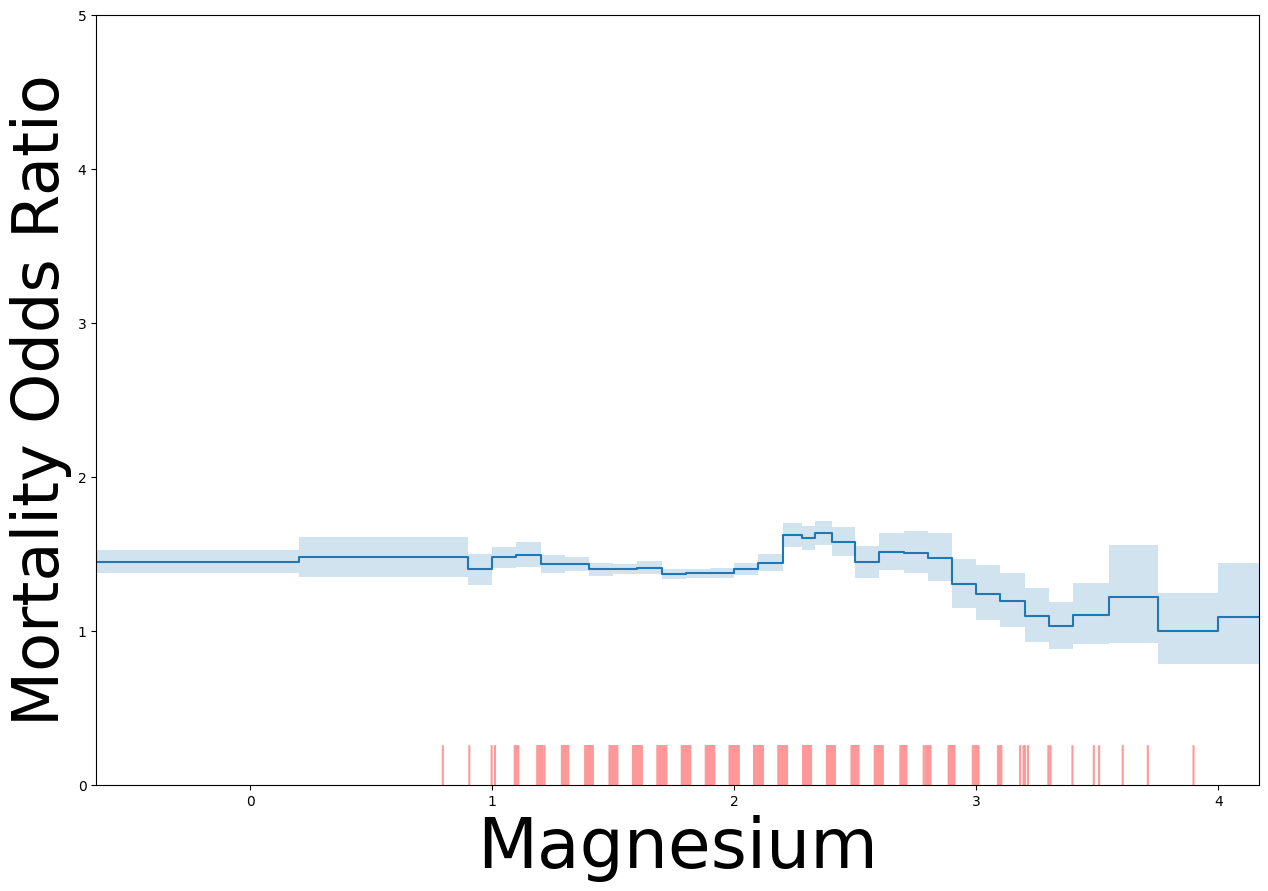

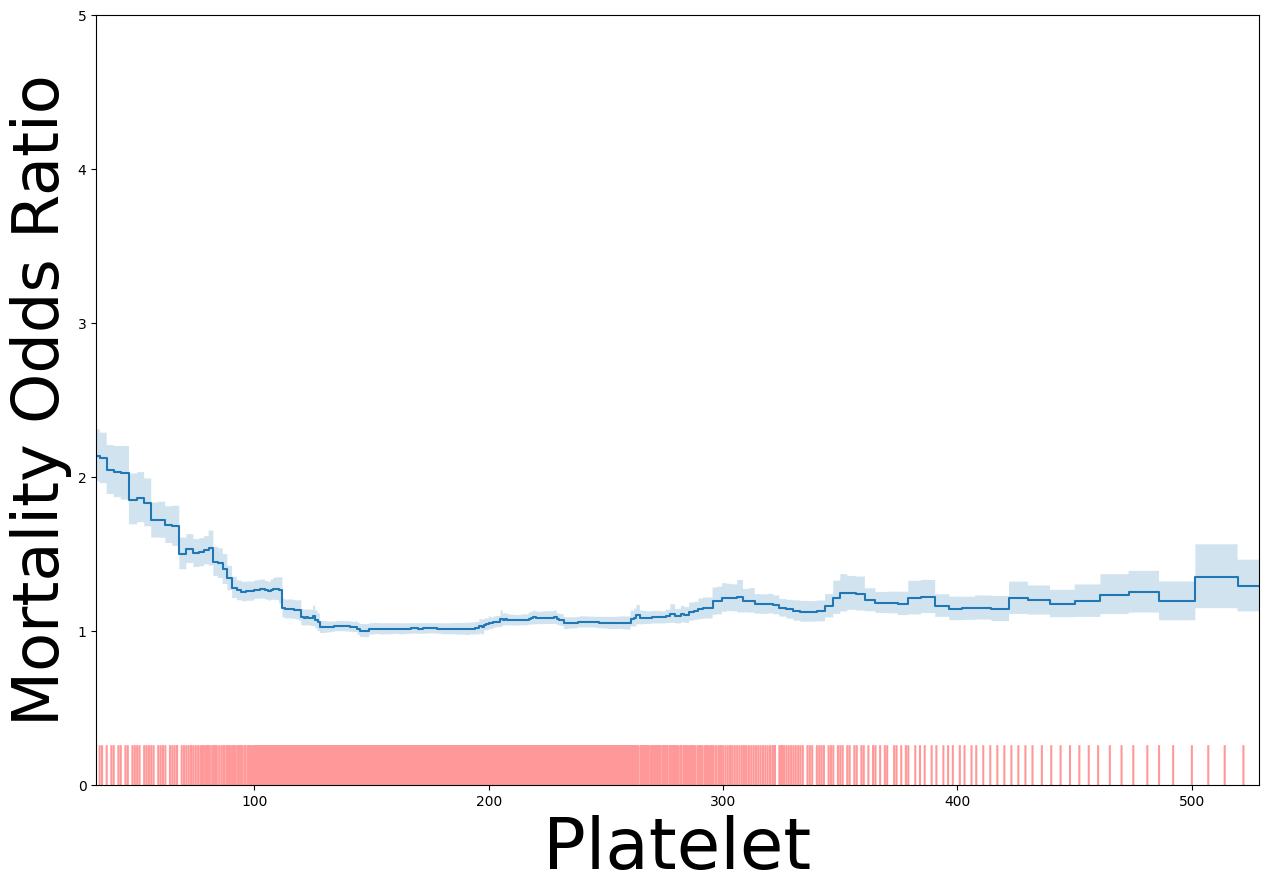

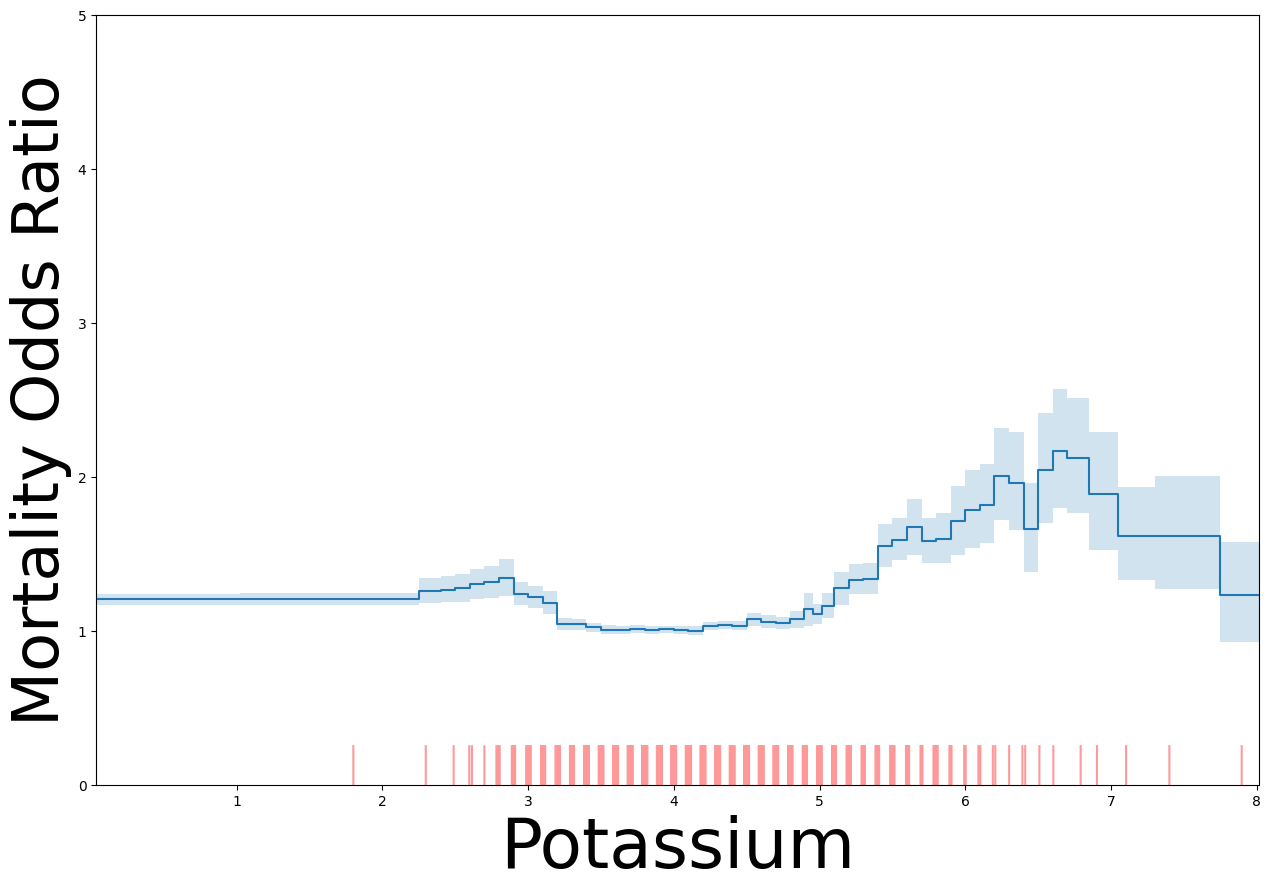

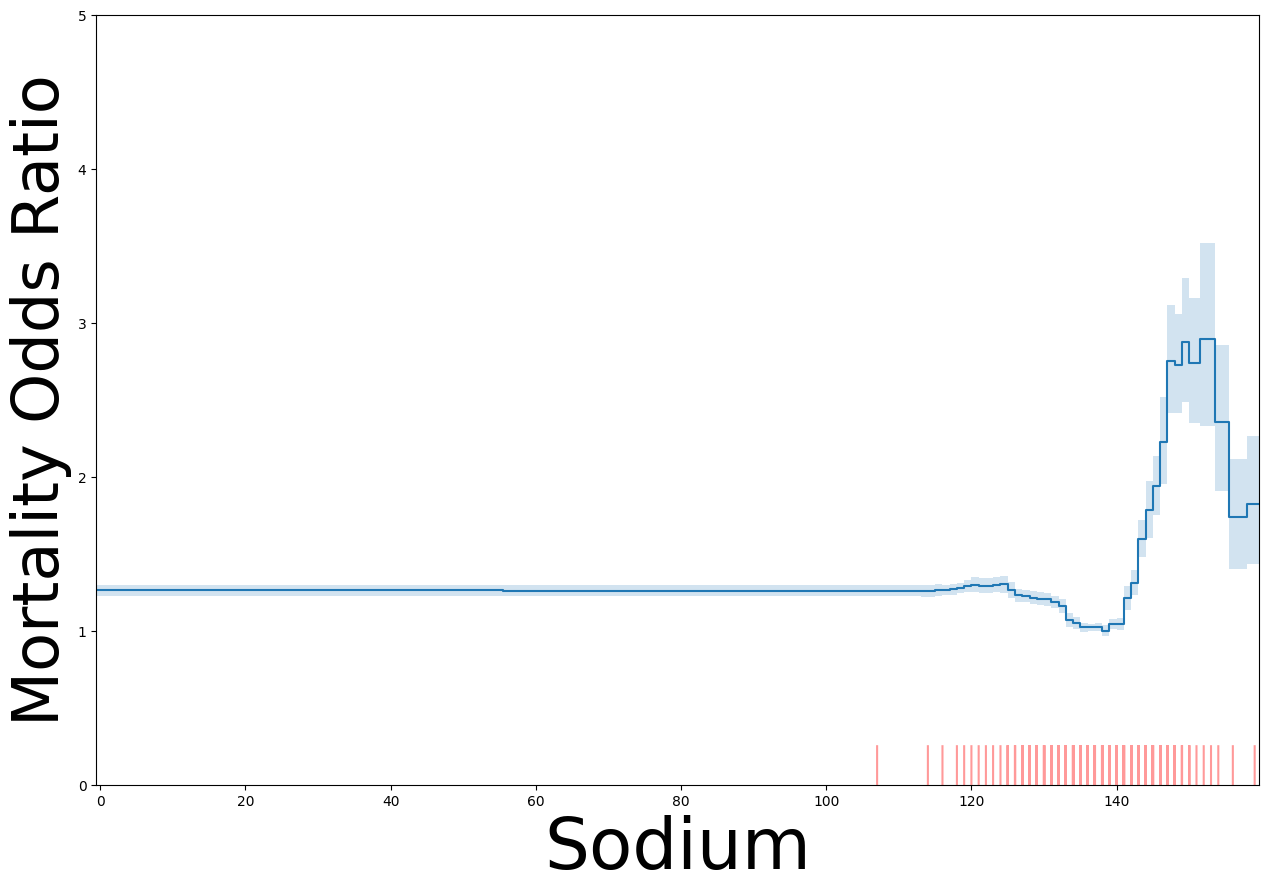

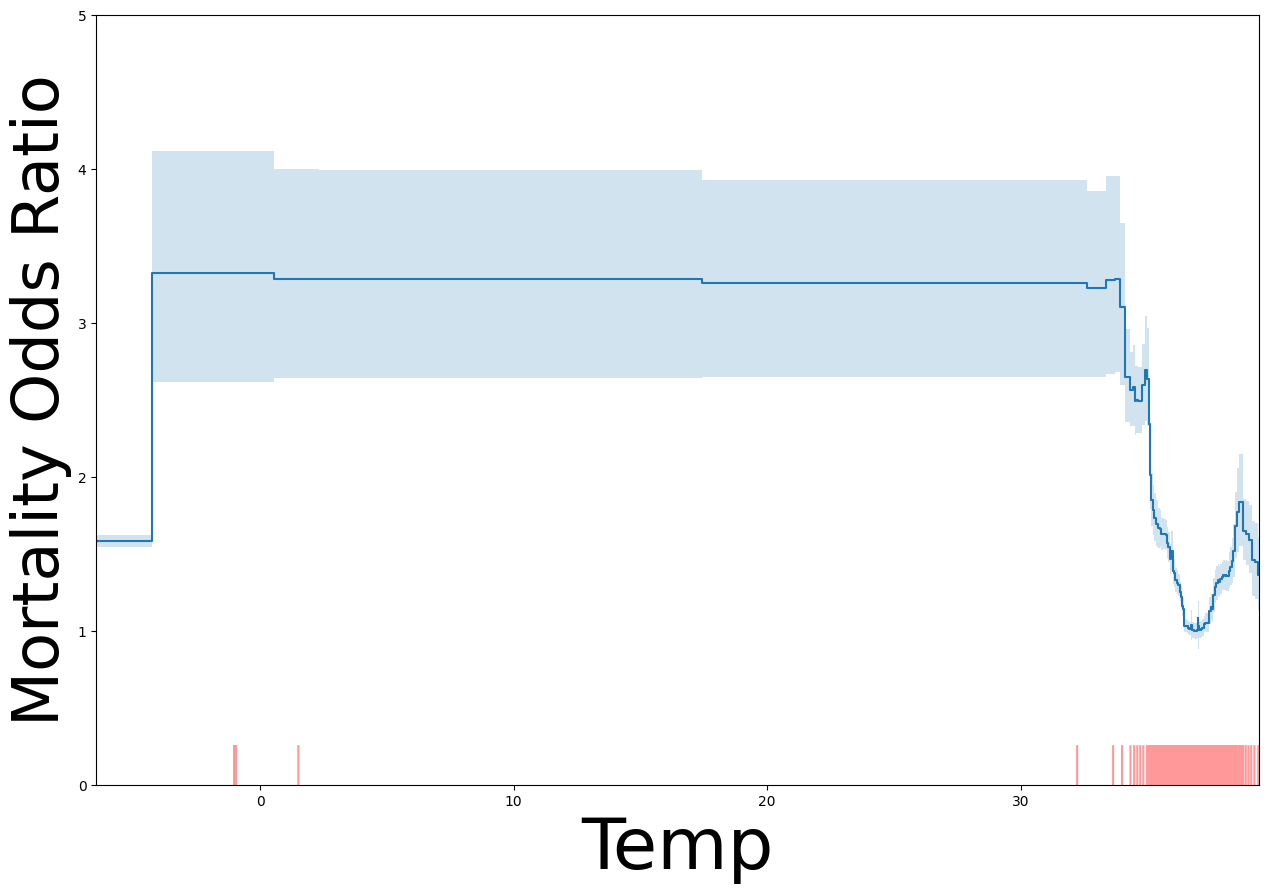

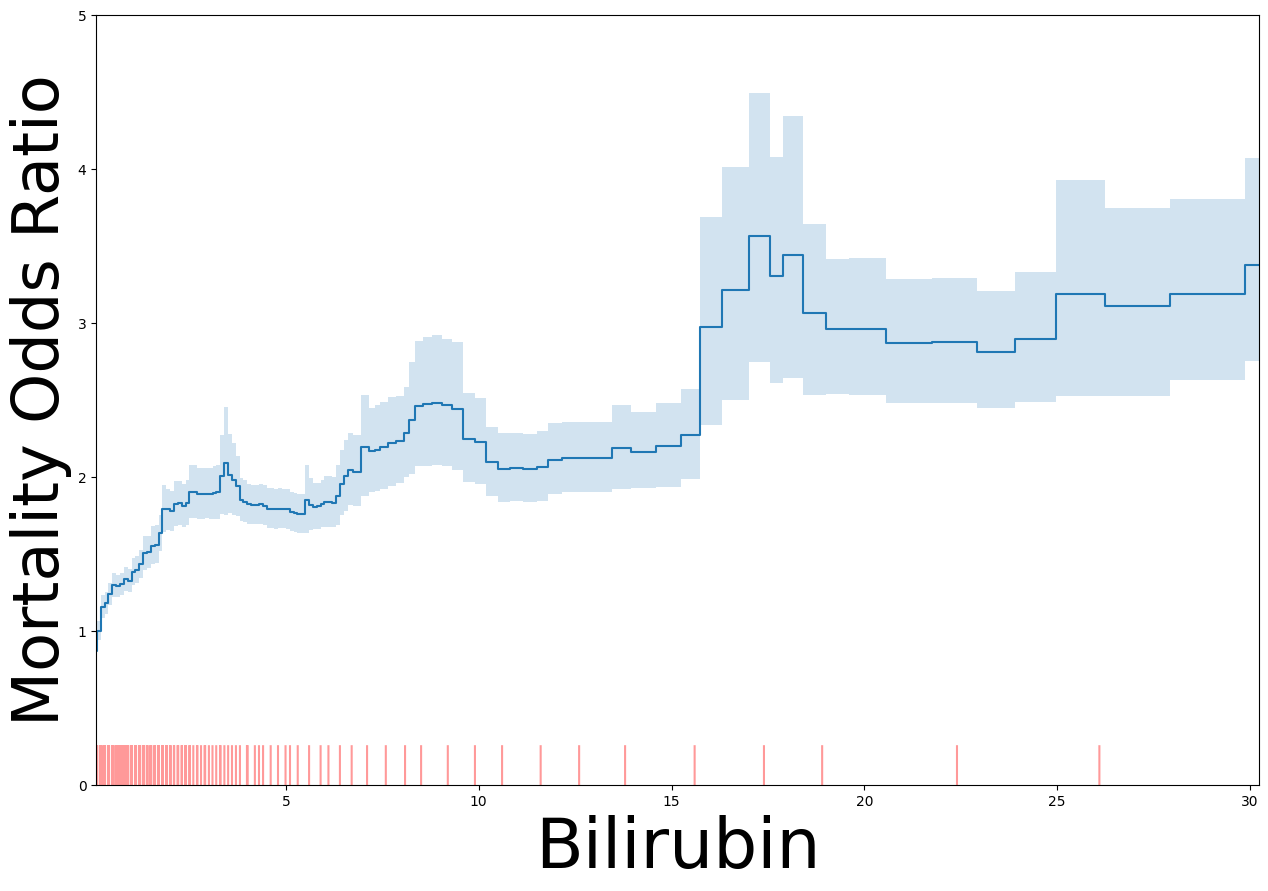

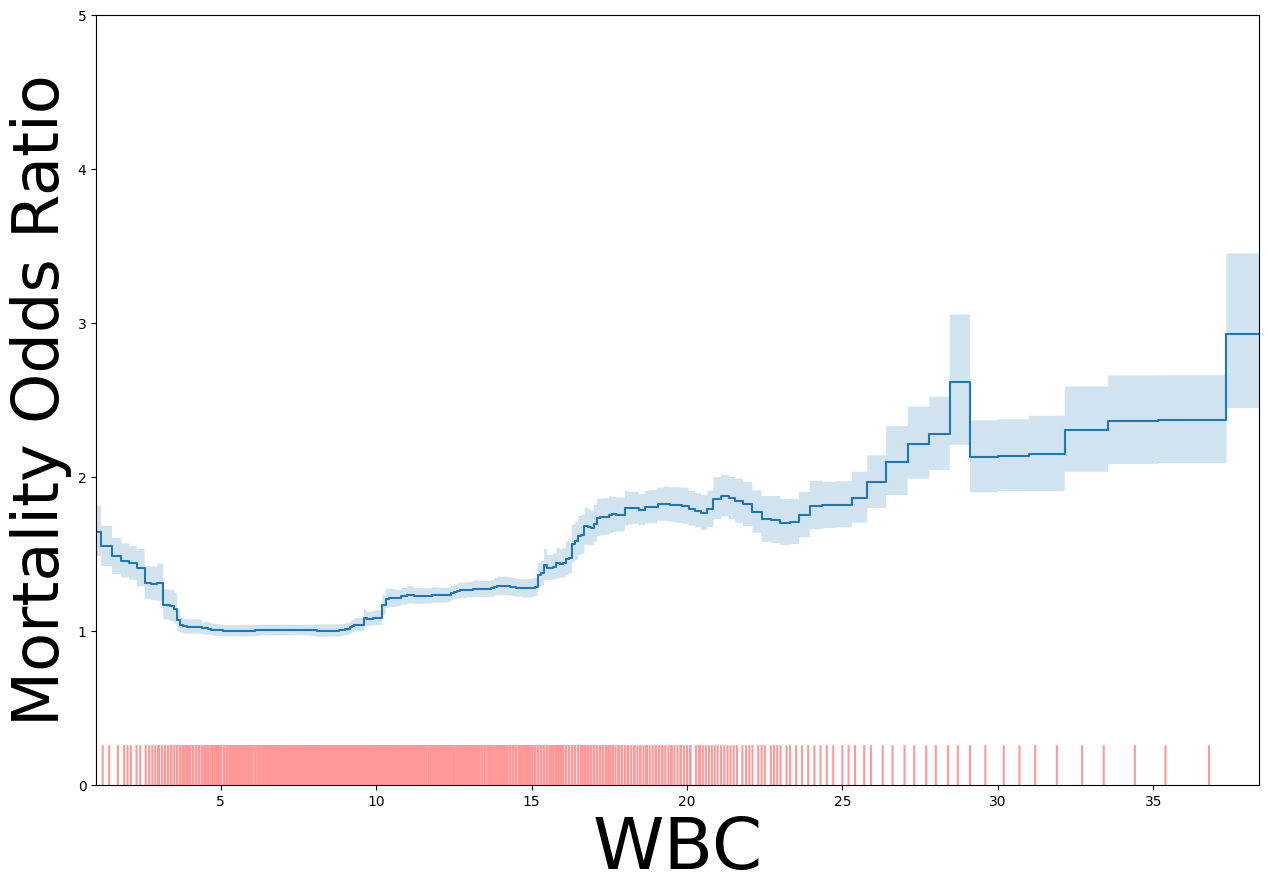

In [10]:
from ebm_utils.analysis.plot_utils import plot_all_features
plot_all_features(
    ebm_globals["mimic4"], mimic4_X_sel,
    bool_mpl_style=True, bool_figsize=(12, 12),
    ylabel='Mortality Odds Ratio',
)